# Project 1: SAT & ACT Analysis

## Problem Statement

Working as an analyst on the Colorado State board, you are tasked to compare 2018 Colorado SAT results to neighboring states and examine participation rates in the state after last years transition to SAT standardized testing.  

## Executive Summary

After The College Board, makers of the SAT, won over the state of Colorado, the state began its transition to a new testing standard. 

The following project contains data from 2017 and 2018 on the National ACT and SAT testing averages and participation rates.

This data will help produce a status report on the current average scores as compared to neighboring states and supporting participation documents from both the ACT and the SAT for Colorado State. 

Our bennchmarks for 2018 were:
    a. 100% participation rate by during the 2018 school year.
    b. 1200 total average score on the SAT standardized test during the 2018 school year. 

source: https://chalkbeat.org/posts/co/2015/12/23/goodbye-act-hello-sat-a-significant-change-for-colorado-high-schoolers/

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

In [168]:
# Imports, etc.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [169]:
# read CSV
act_17_df = pd.read_csv('../data/act_2017.csv') 
sat_17_df = pd.read_csv('../data/sat_2017.csv') 
print('CVS read...')

CVS read...


#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [170]:
print(act_17_df.head(10))
print(sat_17_df.head(10))

                  State Participation  English  Math  Reading  Science  \
0              National           60%     20.3  20.7     21.4     21.0   
1               Alabama          100%     18.9  18.4     19.7     19.4   
2                Alaska           65%     18.7  19.8     20.4     19.9   
3               Arizona           62%     18.6  19.8     20.1     19.8   
4              Arkansas          100%     18.9  19.0     19.7     19.5   
5            California           31%     22.5  22.7     23.1     22.2   
6              Colorado          100%     20.1  20.3     21.2     20.9   
7           Connecticut           31%     25.5  24.6     25.6     24.6   
8              Delaware           18%     24.1  23.4     24.8     23.6   
9  District of Columbia           32%     24.4  23.5     24.9     23.5   

  Composite  
0      21.0  
1      19.2  
2      19.8  
3      19.7  
4      19.4  
5      22.8  
6      20.8  
7      25.2  
8      24.1  
9      24.2  
                  State Partici

#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

**Answer:**

- It looks like we processed two datasets. 
- Both are lists of US states and the associated ACT/SAT results. 
- It looks like the ACT table has a national average but SAT does not. 
- The columns and values are different since the tests are graded differently.
- Participation column looks like it has a % in it, we cant have that in Python. 
    
  

#### 4a. Does the data look complete? 

**Answer:**
- ACT: 
  - a. Wyoming line composite score has an 'x' in it. 
  - b. Maryland Science needs to be 23.6. 

- SAT: 
  - Maryland math scores seem to be really low, but not necessarily wrong. Should be 524. 
  
- merging: 
    - The columns dont match, so we will need to calculate and format them.
    - Since SAT doesnt have the national average, its practically useless to us, so we could probably delete it right away. 

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

In [78]:
print(act_17_df.describe().T)
print(sat_17_df.describe().T)

         count       mean       std   min     25%    50%     75%   max
English   52.0  20.919231  2.332132  16.3  19.000  20.55  23.300  25.5
Math      52.0  21.173077  1.963602  18.0  19.400  20.90  23.100  25.3
Reading   52.0  22.001923  2.048672  18.1  20.475  21.70  24.125  26.0
Science   52.0  21.040385  3.151113   2.3  19.900  21.15  22.525  24.9
                                    count         mean        std    min  \
Evidence-Based Reading and Writing   51.0   569.117647  45.666901  482.0   
Math                                 51.0   547.627451  84.909119   52.0   
Total                                51.0  1126.098039  92.494812  950.0   

                                       25%     50%     75%     max  
Evidence-Based Reading and Writing   533.5   559.0   613.0   644.0  
Math                                 522.0   548.0   599.0   651.0  
Total                               1055.5  1107.0  1212.0  1295.0  


**Answer:**

- ACT: 
  - Maximum score: 
    - English = 25.5
    - Math = 25.3
    - Reading = 26.0
    - Science = 24.9
  - Minimum score:
    - English = 16.3
    - Math = 18.0
    - Reading = 18.1
    - Science = 2.3   * very low in comparison to others. 

- SAT: 
  - Maximum score:
    - R/W = 644.0
    - Math = 651.0
  - Minimum score = 
    - R/W = 482.0
    - Math = 52.0   * flagging this because it is a typo, Maryland is skewing because it should be 524. 

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

- ACT
  - Wyoming line composite score has an 'x' in it. 
  - Maryland science needs to be 23.6, its a typo currently. 

- SAT
  - Maryland math scores seem to be really low, but not necessarily wrong. Should be 524. 

In [79]:
# drop unwanted national column since we cant really compare it to anything
act_17_df.drop(0, inplace=True)

In [80]:
act_17_df.shape

(51, 7)

In [81]:
sat_17_df.shape

(51, 5)

In [82]:
# Now the data set has the same number of rows. 
# replace Maryland-Math score, extrapolated using the rest of the columns. 
act_17_df['Science'].replace(2.3, 23.2, inplace=True)

In [83]:
# replace Maryland-Science score with 524
sat_17_df['Math'].replace(52, 524, inplace=True)

In [84]:
# remove the x from Wyoming 

act_17_df['Composite'].replace('20.2x', '23.2', inplace=True)

#### 5. What are your data types? 
Display the data types of each feature. 

In [85]:
#code
act_17_df.dtypes

# why is composite an object?
# State needs to be a string?
# Participation is an object even though it should be a %
# This is why when we call df.describe() we dont get the participation column.
# but python doesnt have %s data type, i dont think we can calculate on this column currently.
# Can fix that by removing the % and just change to a float. 

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

In [86]:
sat_17_df.dtypes

# here I would just do the same process on Participation column as above.

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

**Answer:**

- The data types are very odd. I was confused why Participation rate was not showing up in .describe(), it was because its not an actual value, its an object list. Need to have to convert to float, will also match the other columns. 

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [87]:
# define function 

def convert_object(n):
    return float(n.strip('%'))/100

# apply function to participaton column

act_17_df['Participation'] = act_17_df['Participation'].apply(convert_object)

In [88]:
# do the same for SAT

sat_17_df['Participation'] = sat_17_df['Participation'].apply(convert_object)

In [89]:
act_17_df['Composite'] = act_17_df['Composite'].astype(float)

In [90]:
act_17_df.head()

,State,Participation,English,Math,Reading,Science,Composite
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4
5,California,0.31,22.5,22.7,23.1,22.2,22.8


In [91]:
sat_17_df.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,0.05,593,572,1165
1,Alaska,0.38,547,533,1080
2,Arizona,0.30,563,553,1116
3,Arkansas,0.03,614,594,1208
4,California,0.53,531,524,1055


- Fix any individual values preventing other columns from being the appropriate type.

- Finish your data modifications by making sure the columns are now typed appropriately.

- Display the data types again to confirm they are correct.

In [92]:
act_17_df.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [93]:
sat_17_df.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [94]:
# Rename columns for ACT to be more descriptive. 

act_17_df.rename(columns ={
    'State': 'state',
    'Participation': 'act_participation_2017',
    'English': 'act_english_2017',
    'Math': 'act_math_2017',
    'Reading': 'act_reading_2017',
    'Science': 'act_science_2017',
    'Composite': 'act_composite_2017'}, inplace=True)

In [95]:
# Rename columns for SAT to be more descriptive. 
sat_17_df.rename(columns ={
    'State': 'state',
    'Participation': 'sat_participation_2017',
    'Evidence-Based Reading and Writing': 'sat_rw_2017',
    'Math': 'sat_math_2017',
    'Total': 'sat_total_2017'}, inplace=True)

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

## 2017 ACT/SAT Data Dictionary ##


|Feature|Type|Dataset|Description|
|---|---|---|---|
|**state**|*object*|ACT/SAT|US state associated with the score.| 
|**participation**|*float*|ACT/SAT|Participation rate/score associated with each test (0-100%)|
|**act_english_2017**|*float*|ACT|Average **English** score recorded for **2017** on the ACT by State (1-36)|
|**act_math_2017**|*float*|ACT|Average **Math** score recorded for **2017** on the ACT by State (1-36)|
|**act_reading_2017**|*float*|ACT|Average **Reading** score recorded for **2017** on the ACT by State (1-36)|
|**act_science_2017**|*float*|ACT|Average **Science** score recorded for **2017** on the ACT by State (1-36)|
|**act_composite_2017**|*float*|ACT|Average **Total** score recorded for **2017** on the ACT by State (1-36)|
|**sat_rw_2017**|*float*|SAT|Average **Reading/Writing** score recorded for **2017** on the SAT by State (200-800)|
|**sat_math_2017**|*float*|SAT|Average **Math** score recorded for **2017** on the SAT by State (200-800)|
|**sat_total_2017**|*float*|SAT|Average **Total** score recorded for **2017** on the SAT by State (400-1600)|

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [96]:
# removed the national average score from ACT, since nothing to compare to. 
# ran this code above. 

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [97]:
#Code:

combined_test_scores_2017 = pd.merge(act_17_df, sat_17_df, on='state')

In [98]:
combined_test_scores_2017.head(10)

,state,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_2017,sat_rw_2017,sat_math_2017,sat_total_2017
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,1165
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547,533,1080
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563,553,1116
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,1208
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531,524,1055
5,Colorado,1.00,20.1,20.3,21.2,20.9,20.8,0.11,606,595,1201
6,Connecticut,0.31,25.5,24.6,25.6,24.6,25.2,1.00,530,512,1041
7,Delaware,0.18,24.1,23.4,24.8,23.6,24.1,1.00,503,492,996
8,District of Columbia,0.32,24.4,23.5,24.9,23.5,24.2,1.00,482,468,950
9,Florida,0.73,19.0,19.4,21.0,19.4,19.8,0.83,520,497,1017


In [99]:
combined_test_scores_2017.loc[5]

state                     Colorado
act_participation_2017           1
act_english_2017              20.1
act_math_2017                 20.3
act_reading_2017              21.2
act_science_2017              20.9
act_composite_2017            20.8
sat_participation_2017        0.11
sat_rw_2017                    606
sat_math_2017                  595
sat_total_2017                1201
Name: 5, dtype: object

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [100]:
#code:

combined_test_scores_2017.to_csv('../data/combined_2017.csv')

## 2018 Data Import and Cleaning

Read in the `sat_2018.csv` and `act_2018.csv` files and assign them to appropriately named pandas dataframes. For the **2018 ACT Data**, only the `Composite` scores are available. Repeat the same processes to clean the 2018 data here as you were instructed in the previous sections above.

In [101]:
act_18_df = pd.read_csv('../data/act_2018.csv') 
sat_18_df = pd.read_csv('../data/sat_2018.csv') 

In [102]:
act_18_df.drop([19], axis=0,inplace=True)

In [103]:
sat_18_df.shape

(51, 5)

In [104]:
act_18_df.dtypes

State             object
Participation     object
Composite        float64
dtype: object

In [105]:
# clean/format ACT scores: 
# strip % and 

act_18_df['Participation'] = act_18_df['Participation'].apply(convert_object)

In [106]:
sat_18_df['Participation'] = sat_18_df['Participation'].apply(convert_object)

In [107]:
act_18_df.rename(columns ={
    'State': 'state',
    'Participation': 'act_participation_2018',
    'Composite': 'act_composite_2018'}, inplace=True)

In [108]:
sat_18_df.rename(columns ={
    'State': 'state',
    'Participation': 'sat_participation_2018',
    'Evidence-Based Reading and Writing': 'sat_rw_2018',
    'Math': 'sat_math_2018',
    'Total': 'sat_total_2018'}, inplace=True)

In [109]:
act_18_df.dtypes

state                      object
act_participation_2018    float64
act_composite_2018        float64
dtype: object

In [110]:
sat_18_df.dtypes

state                      object
sat_participation_2018    float64
sat_rw_2018                 int64
sat_math_2018               int64
sat_total_2018              int64
dtype: object

In [111]:
# merge them:

combined_test_scores_2018 = pd.merge(act_18_df, sat_18_df, on='state')

In [112]:
combined_test_scores_2018.describe().T

,count,mean,std,min,25%,50%,75%,max
act_participation_2018,50.0,0.6232,0.341141,0.07,0.2775,0.66,1.000,1.0
act_composite_2018,50.0,21.4540,2.111312,17.70,19.9250,21.05,23.650,25.6
sat_participation_2018,50.0,0.4482,0.370976,0.02,0.0425,0.50,0.745,1.0
sat_rw_2018,50.0,565.0200,47.010416,480.00,535.0000,552.00,612.750,643.0
sat_math_2018,50.0,557.7600,46.987432,486.00,524.2500,545.50,594.250,655.0
sat_total_2018,50.0,1122.8800,92.845634,998.00,1062.2500,1098.50,1207.000,1298.0


#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [113]:
final = pd.merge(combined_test_scores_2017, combined_test_scores_2018, on='state')

In [114]:
final[(final['state'].sort_values() == 'Colorado')]

# use this in the slides! 

,state,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_2017,sat_rw_2017,sat_math_2017,sat_total_2017,act_participation_2018,act_composite_2018,sat_participation_2018,sat_rw_2018,sat_math_2018,sat_total_2018
5,Colorado,1.0,20.1,20.3,21.2,20.9,20.8,0.11,606,595,1201,0.3,23.9,1.0,519,506,1025


In [115]:
# final['sat_rw_2017'] = float()
# final['sat_math_2017'] = float()
# final['sat_total_2017'] = float()
# final['sat_rw_2018'] = float()
# final['sat_math_2018'] = float()
# final['sat_total_2018'] = float()

In [116]:
final.to_csv('../data/final.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [117]:
#Code:

final.describe().T

,count,mean,std,min,25%,50%,75%,max
act_participation_2017,50.0,0.6592,0.321107,0.08,0.3100,0.71,1.000,1.0
act_english_2017,50.0,20.8620,2.324307,16.30,19.0000,20.55,23.100,25.5
act_math_2017,50.0,21.1360,1.973990,18.00,19.4000,20.90,23.000,25.3
act_reading_2017,50.0,21.9560,2.046317,18.10,20.4250,21.70,23.875,26.0
act_science_2017,50.0,21.4100,1.731962,18.20,19.9250,21.30,22.975,24.9
act_composite_2017,50.0,21.5260,2.010463,17.80,19.8000,21.40,23.500,25.5
sat_participation_2017,50.0,0.3860,0.345602,0.02,0.0400,0.34,0.650,1.0
sat_rw_2017,50.0,570.8600,44.385146,503.00,535.2500,559.50,613.500,644.0
sat_math_2017,50.0,558.6600,45.839832,492.00,524.0000,549.50,601.000,651.0
sat_total_2017,50.0,1129.6200,89.913085,996.00,1057.0000,1107.50,1214.000,1295.0


In [118]:
final.shape

(50, 17)

notes:
    count = good 
    mean = 

#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [119]:
#code
def st_dev(list1):
    average = sum(list1)/len(list1)
    
    new_list = []
    
    for number in list1:
        new_list.append((number - average)**2)
    return (sum(new_list)/len(list1))**0.5

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [120]:
#Code:
{column.name:st_dev(column) for column in [final[i] for i in final.columns if (final[i].dtype=='float64' or (final[i].dtype=='int64'))]}

{'act_participation_2017': 0.3178794740149165,
 'act_english_2017': 2.3009467616613812,
 'act_math_2017': 1.9541504548012678,
 'act_reading_2017': 2.025750231395766,
 'act_science_2017': 1.7145553359399048,
 'act_composite_2017': 1.9902572698020722,
 'sat_participation_2017': 0.3421286307808805,
 'sat_rw_2017': 43.9390532442382,
 'sat_math_2017': 45.37911854586864,
 'sat_total_2017': 89.00941298536914,
 'act_participation_2018': 0.33771254048376703,
 'act_composite_2018': 2.090091864009809,
 'sat_participation_2018': 0.36724754594142633,
 'sat_rw_2018': 46.537937212558106,
 'sat_math_2018': 46.51518461749884,
 'sat_total_2018': 91.91248881408882}

In [121]:
np.std(final)

act_participation_2017     0.317879
act_english_2017           2.300947
act_math_2017              1.954150
act_reading_2017           2.025750
act_science_2017           1.714555
act_composite_2017         1.990257
sat_participation_2017     0.342129
sat_rw_2017               43.939053
sat_math_2017             45.379119
sat_total_2017            89.009413
act_participation_2018     0.337713
act_composite_2018         2.090092
sat_participation_2018     0.367248
sat_rw_2018               46.537937
sat_math_2018             46.515185
sat_total_2018            91.912489
dtype: float64

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

**Answer:**
    
    Somewhat, I think the integers in the sat data is causing some of them to be not as approximate. 
    But its very close with all three methods. 
    the . describe method is more different, because its a different calc...

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [122]:
# 2017 SAT MAX
final.sort_values(by=['sat_participation_2017'], ascending=False)[['state', 'sat_participation_2017']].head(6)

# north/eastern states participated the most in 2017.

,state,sat_participation_2017
21,Michigan,1.00
6,Connecticut,1.00
7,Delaware,1.00
28,New Hampshire,0.96
18,Maine,0.95
11,Idaho,0.93


In [123]:
final.sort_values(by=['sat_participation_2018'], ascending=False)[['state', 'sat_participation_2018', 'sat_rw_2018', 'sat_math_2018', 'sat_total_2018']].head(6)

,state,sat_participation_2018,sat_rw_2018,sat_math_2018,sat_total_2018
5,Colorado,1.00,519,506,1025
6,Connecticut,1.00,535,519,1053
7,Delaware,1.00,505,492,998
21,Michigan,1.00,511,499,1011
11,Idaho,1.00,508,493,1001
18,Maine,0.99,512,501,1013


In [124]:
# 2017 SAT MIN
final.sort_values(by=['sat_participation_2017'], ascending=True)[['state', 'sat_participation_2017']].head(6)

# mid-US states participated the least in 2017, states west of the midwest. 

,state,sat_participation_2017
33,North Dakota,0.02
23,Mississippi,0.02
14,Iowa,0.02
24,Missouri,0.03
43,Utah,0.03
40,South Dakota,0.03


In [125]:
# 2018 SAT MAX

final.sort_values(by=['sat_participation_2018'], ascending=False)[['state', 'sat_participation_2018']].head(6)

# more states started participating in the SAT in 2018 vs 2017. 

,state,sat_participation_2018
5,Colorado,1.00
6,Connecticut,1.00
7,Delaware,1.00
21,Michigan,1.00
11,Idaho,1.00
18,Maine,0.99


In [126]:
# 2018 SAT MIN

final.sort_values(by=['sat_participation_2018'], ascending=True)[['state', 'sat_participation_2018']].head(6)

# i dont see any drastic differences. 

,state,sat_participation_2018
33,North Dakota,0.02
49,Wyoming,0.03
40,South Dakota,0.03
26,Nebraska,0.03
48,Wisconsin,0.03
23,Mississippi,0.03


In [127]:
# 2017 ACT MAX

final.sort_values(by=['act_participation_2017'], ascending=False)[['state', 'act_participation_2017']].head(18)

# a lot more states are participating in ACTs than SATs on a 100% basis. 

,state,act_participation_2017
0,Alabama,1.00
16,Kentucky,1.00
48,Wisconsin,1.00
43,Utah,1.00
41,Tennessee,1.00
39,South Carolina,1.00
35,Oklahoma,1.00
32,North Carolina,1.00
27,Nevada,1.00
24,Missouri,1.00


In [128]:
# 2017 ACT MIN

final.sort_values(by=['act_participation_2017'], ascending=True)[['state', 'act_participation_2017']].head(10)

# many states picked up a few basis points of participation but not by much. 

,state,act_participation_2017
18,Maine,0.08
7,Delaware,0.18
28,New Hampshire,0.18
38,Rhode Island,0.21
37,Pennsylvania,0.23
19,Maryland,0.28
46,Washington,0.29
44,Vermont,0.29
21,Michigan,0.29
20,Massachusetts,0.29


In [129]:
# 2018 ACT MAX

final.sort_values(by=['act_participation_2018'], ascending=False)[['state', 'act_participation_2018']].head(18)

# the participation between 2017 and 18 is very similar. 

# Colorado switched to SAT in 2018

,state,act_participation_2018
0,Alabama,1.00
16,Kentucky,1.00
48,Wisconsin,1.00
43,Utah,1.00
41,Tennessee,1.00
39,South Carolina,1.00
35,Oklahoma,1.00
34,Ohio,1.00
32,North Carolina,1.00
27,Nevada,1.00


In [130]:
# 2018 ACT MIN

final.sort_values(by=['act_participation_2018'], ascending=True)[['state', 'act_participation_2018']].head(20)

# maryland seems to have increased pariticipation slightly between 17 and 18. 

,state,act_participation_2018
18,Maine,0.07
38,Rhode Island,0.15
28,New Hampshire,0.16
7,Delaware,0.17
37,Pennsylvania,0.20
21,Michigan,0.22
45,Virginia,0.24
44,Vermont,0.24
46,Washington,0.24
20,Massachusetts,0.25


In [131]:
# 2017 SAT, MAX, TOTAL SCORE

final.sort_values(by=['sat_total_2017'], ascending=False)[['state', 'sat_total_2017']].head(10)

# scores stay about the same and so does the standard deviation between 2017 and 2018 SAT scores. 

,state,sat_total_2017
22,Minnesota,1295
48,Wisconsin,1291
14,Iowa,1275
24,Missouri,1271
15,Kansas,1260
33,North Dakota,1256
26,Nebraska,1253
16,Kentucky,1247
23,Mississippi,1242
43,Utah,1238


In [132]:
# 2017 SAT, MIN, TOTAL SCORE

final.sort_values(by=['sat_total_2017'], ascending=True)[['state', 'sat_total_2017']].head(20)

# lowest average score is basically 1000, and highest average score is basically 1300 1000-1300. 200 point difference. 

,state,sat_total_2017
7,Delaware,996
11,Idaho,1005
21,Michigan,1005
18,Maine,1012
8,Florida,1017
42,Texas,1020
6,Connecticut,1041
35,Oklahoma,1047
9,Georgia,1050
31,New York,1052


In [133]:
# 2018 SAT, MAX, TOTAL SCORE

final.sort_values(by=['sat_total_2018'], ascending=False)[['state', 'sat_total_2018']].head(50)

,state,sat_total_2018
22,Minnesota,1298
48,Wisconsin,1294
33,North Dakota,1283
14,Iowa,1265
15,Kansas,1265
24,Missouri,1262
49,Wyoming,1257
26,Nebraska,1252
16,Kentucky,1248
40,South Dakota,1240


In [134]:
# 2018 SAT, MIN, TOTAL SCORE

final.sort_values(by=['sat_total_2018'], ascending=True)[['state', 'sat_total_2018']].head(20)

# WEst virginia score dropped in 2018. 
# Utah  dropped in 2018. 
# Florida went up in scores in 2018

,state,sat_total_2018
7,Delaware,998
47,West Virginia,999
11,Idaho,1001
43,Utah,1010
10,Hawaii,1010
21,Michigan,1011
18,Maine,1013
38,Rhode Island,1018
12,Illinois,1019
5,Colorado,1025


In [135]:
# 2017 ACT, MAX, COMPOSITE SCORE

final.sort_values(by=['act_composite_2017'], ascending=False)[['state', 'act_composite_2017']].head(10)

# north eastern states score well on ACTs 

,state,act_composite_2017
28,New Hampshire,25.5
20,Massachusetts,25.4
6,Connecticut,25.2
18,Maine,24.3
31,New York,24.2
7,Delaware,24.1
21,Michigan,24.1
38,Rhode Island,24.0
29,New Jersey,23.9
45,Virginia,23.8


In [136]:
# 2017 ACT, MIN, COMPOSITE SCORE

final.sort_values(by=['act_composite_2017'], ascending=True)[['state', 'act_composite_2017']].head(10)

# Many southern states score lower on the ACTs

,state,act_composite_2017
27,Nevada,17.8
23,Mississippi,18.6
39,South Carolina,18.7
10,Hawaii,19.0
32,North Carolina,19.1
0,Alabama,19.2
3,Arkansas,19.4
35,Oklahoma,19.4
17,Louisiana,19.5
2,Arizona,19.7


In [137]:
# 2018 ACT, MAX, COMPOSITE SCORE

final.sort_values(by=['act_composite_2018'], ascending=False)[['state', 'act_composite_2018']].head()

# north eastern states still score the best on ACTs. 

,state,act_composite_2018
6,Connecticut,25.6
20,Massachusetts,25.5
28,New Hampshire,25.1
31,New York,24.5
21,Michigan,24.2


In [138]:
# 2018 ACT, MIN, COMPOSITE SCORE

final.sort_values(by=['act_composite_2018'], ascending=True)[['state', 'act_composite_2018']].head(10)

# southern states are still scoring low on ACTs in 2018 also. 

,state,act_composite_2018
27,Nevada,17.7
39,South Carolina,18.3
23,Mississippi,18.6
10,Hawaii,18.9
0,Alabama,19.1
32,North Carolina,19.1
2,Arizona,19.2
17,Louisiana,19.2
35,Oklahoma,19.3
3,Arkansas,19.4


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

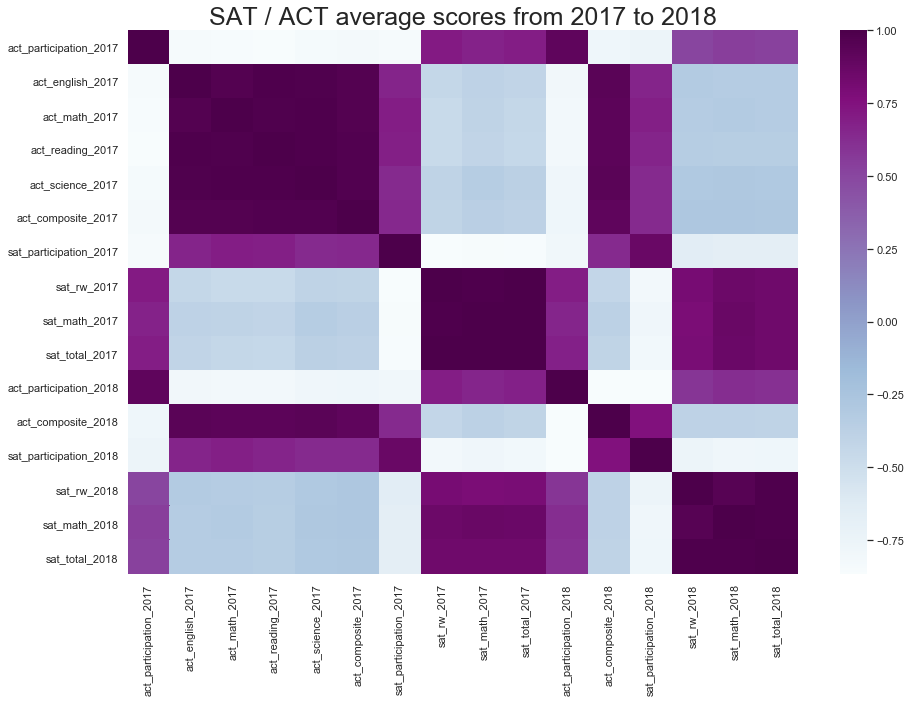

In [139]:
sns.set(rc={'figure.figsize':(15,10)})

sns.heatmap(final.corr(), cmap='BuPu').set_title('SAT / ACT average scores from 2017 to 2018', fontsize=25);

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [140]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels, colors):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(18,15)) # You'll want to specify your figsize ( figsize=())
    
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column],# feel free to add more settings
                  color=colors[i]) # color
        
        ax[i].set_xlabel(list_of_xlabels)
        ax[i].set_title(list_of_titles[i], fontsize=20) # Set titles, labels, etc here for each subplot

In [141]:
final.head()

,state,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_2017,sat_rw_2017,sat_math_2017,sat_total_2017,act_participation_2018,act_composite_2018,sat_participation_2018,sat_rw_2018,sat_math_2018,sat_total_2018
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,1165,1.00,19.1,0.06,595,571,1166
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547,533,1080,0.33,20.8,0.43,562,544,1106
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563,553,1116,0.66,19.2,0.29,577,572,1149
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,1208,1.00,19.4,0.05,592,576,1169
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531,524,1055,0.27,22.7,0.60,540,536,1076


#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

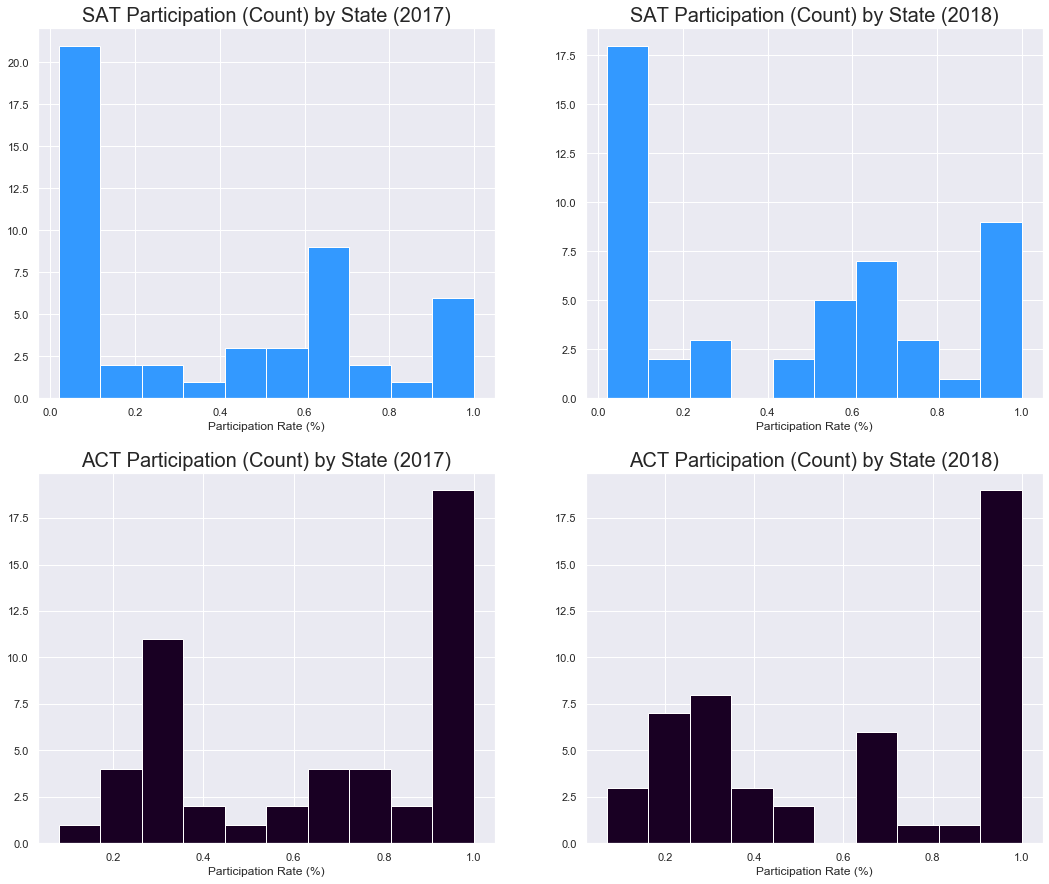

In [142]:
# SAT & ACT Participation rates: 

subplot_histograms(final,
                  ['sat_participation_2017', 'sat_participation_2018', 'act_participation_2017', 'act_participation_2018'],  # columns used
                  ['SAT Participation (Count) by State (2017)', 'SAT Participation (Count) by State (2018)', 'ACT Participation (Count) by State (2017)', 'ACT Participation (Count) by State (2018)'],   # table labels
                  'Participation Rate (%)',   # X-axis labels 
                  ['#3399ff', '#3399ff', '#190023', '#190023'])  # color set #000000
plt.tight_layout;


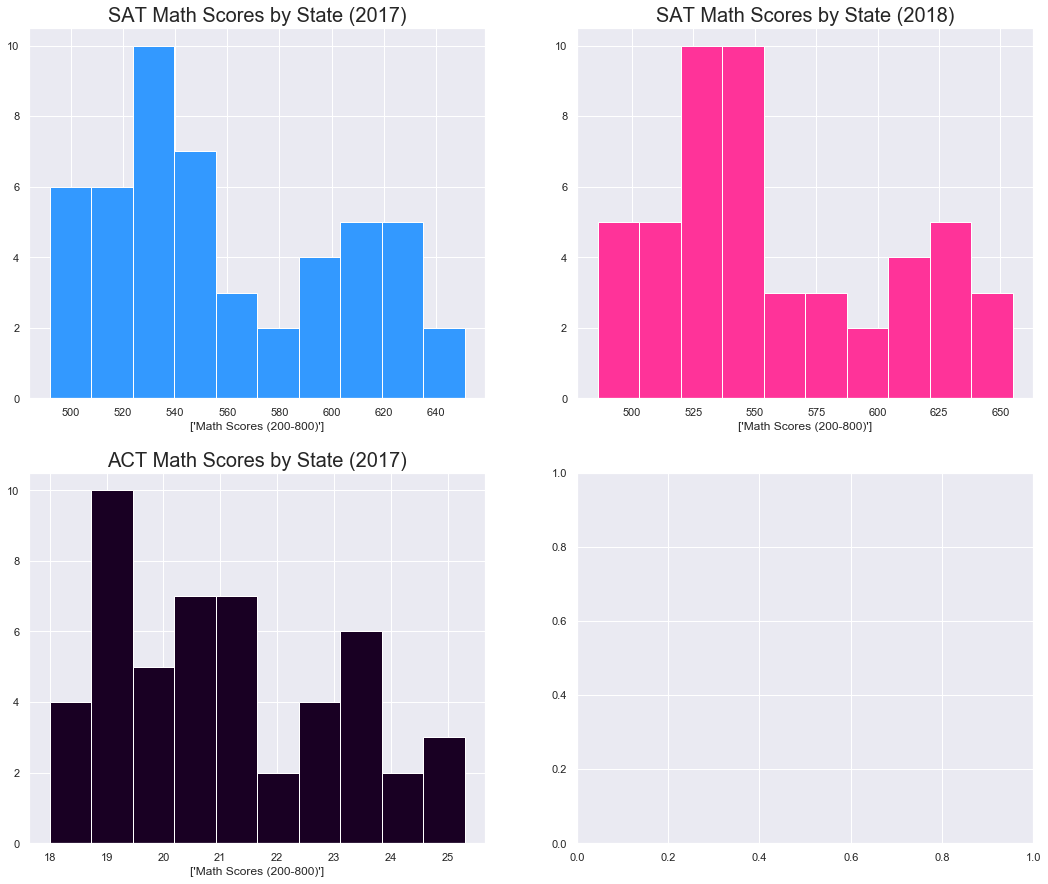

In [143]:
# SAT & ACT Math Scores:

subplot_histograms(final,
                  ['sat_math_2017', 'sat_math_2018', 'act_math_2017'],  # columns used
                  ['SAT Math Scores by State (2017)', 'SAT Math Scores by State (2018)', 'ACT Math Scores by State (2017)'],   # table labels
                  ['Math Scores (200-800)'],   # X-axis labels 
                  ['#3399ff', '#ff3399', '#190023'])  # color set #000000

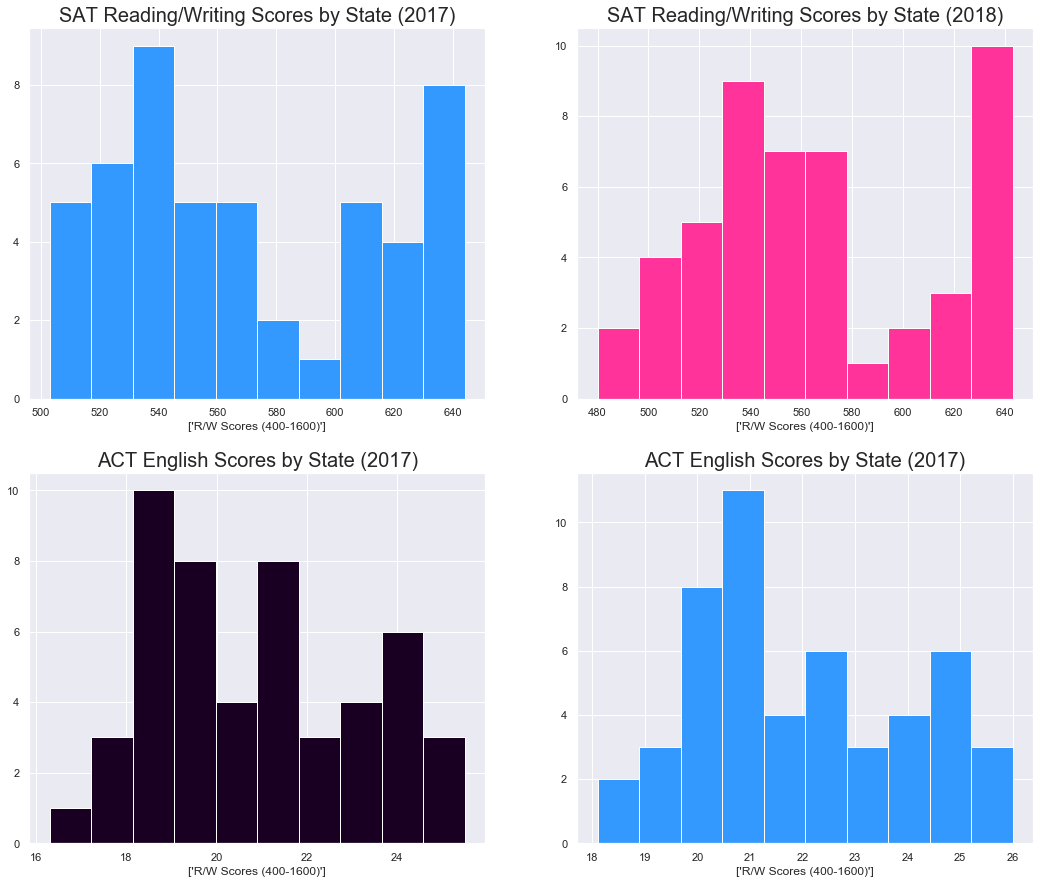

In [144]:
# SAT & ACT Reading/Verbal Scores:

subplot_histograms(final,
                  ['sat_rw_2017', 'sat_rw_2018', 'act_english_2017', 'act_reading_2017'],  # columns used
                  ['SAT Reading/Writing Scores by State (2017)', 'SAT Reading/Writing Scores by State (2018)', 'ACT English Scores by State (2017)', 'ACT English Scores by State (2017)', 'ACT Reading Scores by State (2017)', 'ACT Reading Scores by State (2018)'],   # table labels
                  ['R/W Scores (400-1600)',],   # X-axis labels 
                  ['#3399ff', '#ff3399', '#190023', '#3399ff', '#ff3399', '#190023'])  # color set #000000
plt.tight_layout;

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


''

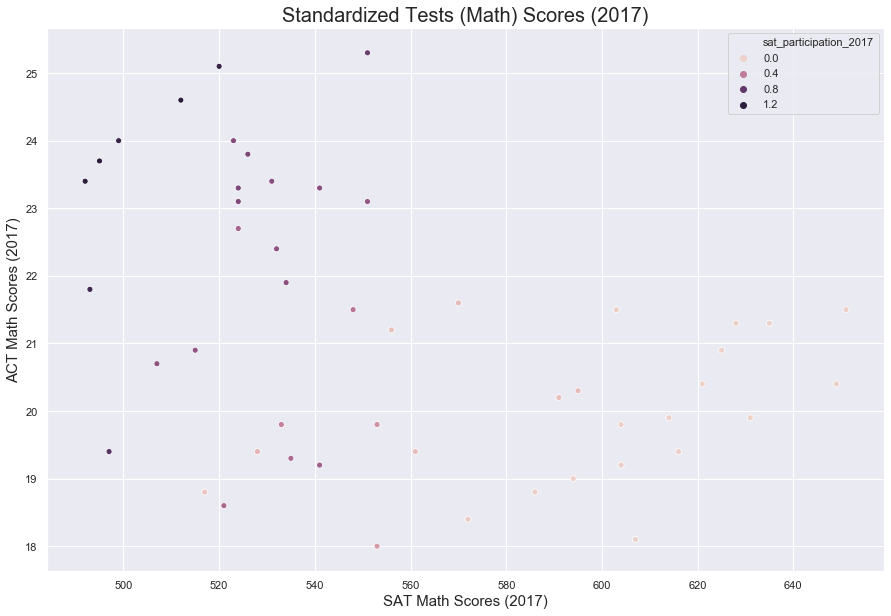

In [145]:
# SAT vs. ACT math scores for 2017

sns.scatterplot(x='sat_math_2017', y='act_math_2017', hue='sat_participation_2017', data=final)   # pass x plot and y plot, pass data.

plt.xlabel('SAT Math Scores (2017)', fontsize=15)                             # create xlabel, pass in fontsize=
plt.ylabel('ACT Math Scores (2017)', fontsize=15)                              # create ylabel
plt.title('Standardized Tests (Math) Scores (2017)', fontsize=20)               # write title
;

**Scatterplot:**

**Figure. 1**

**Scatterplot above shows the disribution of states on a graph of math scores and compared to previous years results.**

**States with high participation rates are colored in darker hues and vice-versa.**

Note: States with higher SAT participation score better on the ACT.

''

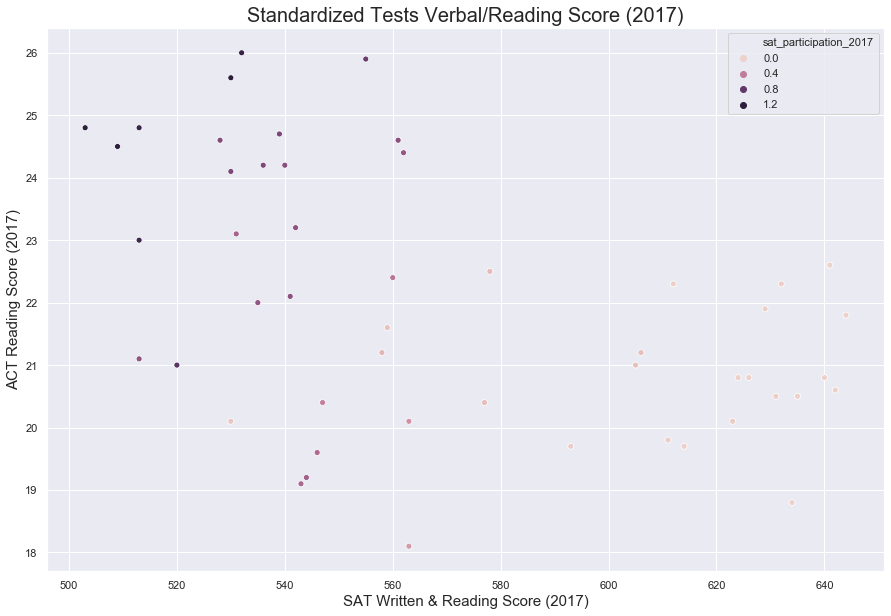

In [146]:
# SAT vs. ACT verbal/reading scores for 2017

sns.scatterplot(x='sat_rw_2017', y='act_reading_2017', hue='sat_participation_2017', data=final)   # pass x plot and y plot, pass data.

plt.xlabel('SAT Written & Reading Score (2017)', fontsize=15)                                 # create xlabel, pass in fontsize=
plt.ylabel('ACT Reading Score (2017)', fontsize=15)                                            # create ylabel
plt.title('Standardized Tests Verbal/Reading Score (2017)', fontsize=20)                        # write title
; 

**Scatterplot:**

**Figure. 2**

**Scatterplot above shows the disribution of states on a graph of ACT & SAT reading/verbal scores and compared to previous years results.**

Note: States with high participation on the SAT test better on the ACT.

''

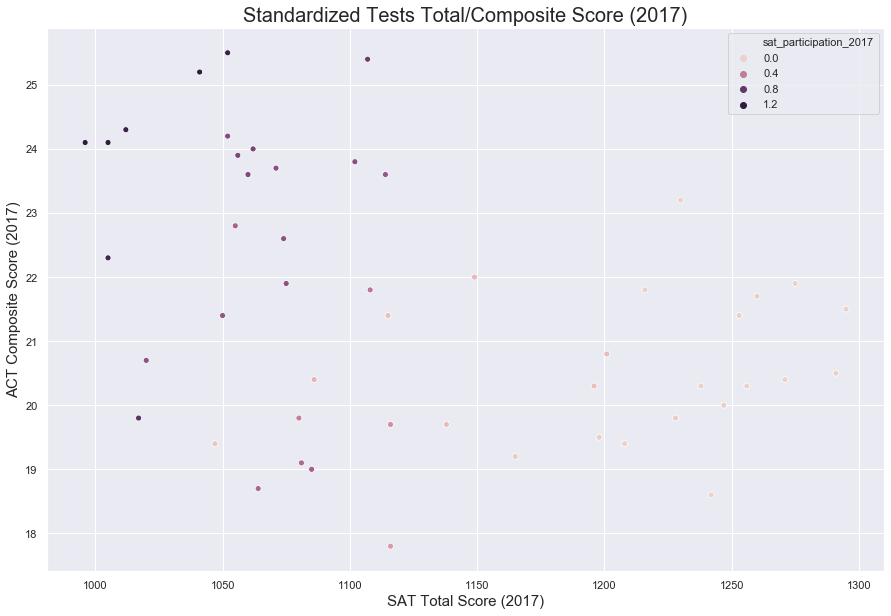

In [147]:
# SAT vs. ACT total/composite scores for 2017

sns.scatterplot(x='sat_total_2017', y='act_composite_2017', hue='sat_participation_2017', data=final)   # pass x plot and y plot, pass data.

plt.xlabel('SAT Total Score (2017)', fontsize=15)                                 # create xlabel, pass in fontsize=
plt.ylabel('ACT Composite Score (2017)', fontsize=15)                                               # create ylabel
plt.title('Standardized Tests Total/Composite Score (2017)', fontsize=20)                            # write title
; 

**Scatterplot:**

**Figure. 3**

**Scatterplot above shows the disribution of states on a graph of ACT & SAT total/composite scores and compared to previous years results.**

Note: States with higher participation on the SAT score better on the ACT.

''

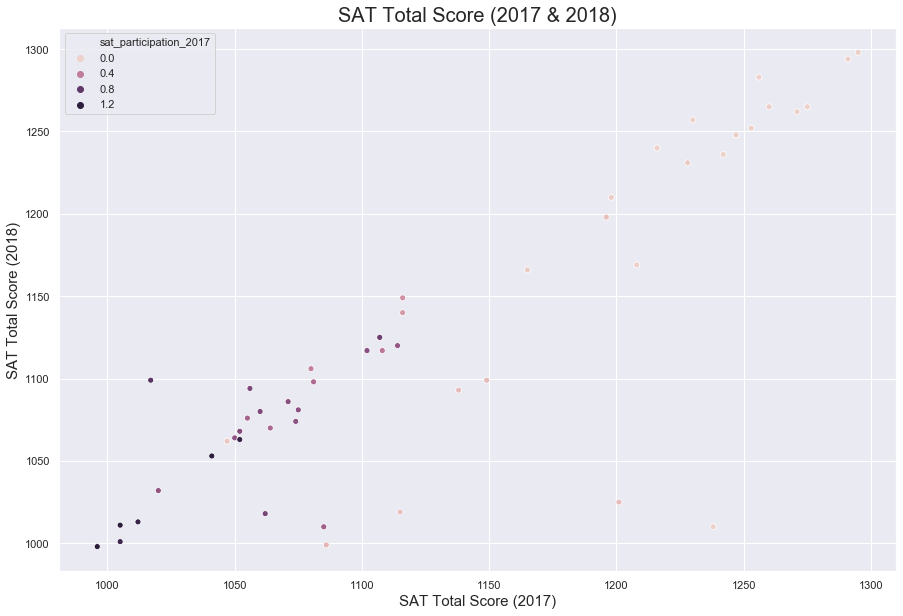

In [148]:
# Total scores for SAT 2017 vs. 2018

sns.scatterplot(x='sat_total_2017', y='sat_total_2018', hue='sat_participation_2017', data=final)   # pass x plot and y plot, pass data.

plt.xlabel('SAT Total Score (2017)', fontsize=15)                                              # create xlabel, pass in fontsize=
plt.ylabel('SAT Total Score (2018)', fontsize=15)                                               # create ylabel
plt.title('SAT Total Score (2017 & 2018)', fontsize=20)                                          # write title
; 

**Scatterplot:**

**Figure. 4**

**Scatterplot above shows the disribution of states on a graph of SAT total scores and compared to previous years results.**

Note: States with higher participation on the SAT in 2017 are colored in a darker hue to represent past years performance. 
Several states that had light participation in 2017 scoreed highly in both years. 

3 Outliars

''

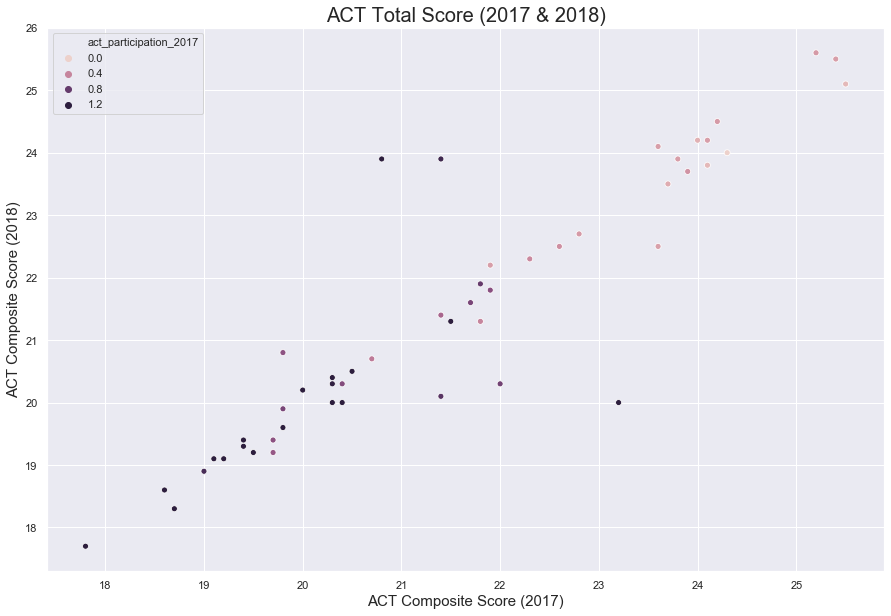

In [149]:
# Composite scores for ACT 2017 vs. 2018

sns.scatterplot(x='act_composite_2017', y='act_composite_2018', hue='act_participation_2017', data=final)   # pass x plot and y plot, pass data.

plt.xlabel('ACT Composite Score (2017)', fontsize=15)                        # create xlabel, pass in fontsize=
plt.ylabel('ACT Composite Score (2018)', fontsize=15)                         # create ylabel
plt.title('ACT Total Score (2017 & 2018)', fontsize=20)                        # write title
; 

**Scatterplot:**

**Figure. 5**

**Scatterplot above shows the disribution of states on a graph of SAT total scores and compared to previous years results.**

Note: States with higher participation on the ACT in 2017 are colored in a darker hue to represent past years performance. 
Many states with high participation in 2017 scored low in 2018.

3 outliars: 



#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [150]:
final.describe().T

,count,mean,std,min,25%,50%,75%,max
act_participation_2017,50.0,0.6592,0.321107,0.08,0.3100,0.71,1.000,1.0
act_english_2017,50.0,20.8620,2.324307,16.30,19.0000,20.55,23.100,25.5
act_math_2017,50.0,21.1360,1.973990,18.00,19.4000,20.90,23.000,25.3
act_reading_2017,50.0,21.9560,2.046317,18.10,20.4250,21.70,23.875,26.0
act_science_2017,50.0,21.4100,1.731962,18.20,19.9250,21.30,22.975,24.9
act_composite_2017,50.0,21.5260,2.010463,17.80,19.8000,21.40,23.500,25.5
sat_participation_2017,50.0,0.3860,0.345602,0.02,0.0400,0.34,0.650,1.0
sat_rw_2017,50.0,570.8600,44.385146,503.00,535.2500,559.50,613.500,644.0
sat_math_2017,50.0,558.6600,45.839832,492.00,524.0000,549.50,601.000,651.0
sat_total_2017,50.0,1129.6200,89.913085,996.00,1057.0000,1107.50,1214.000,1295.0


''

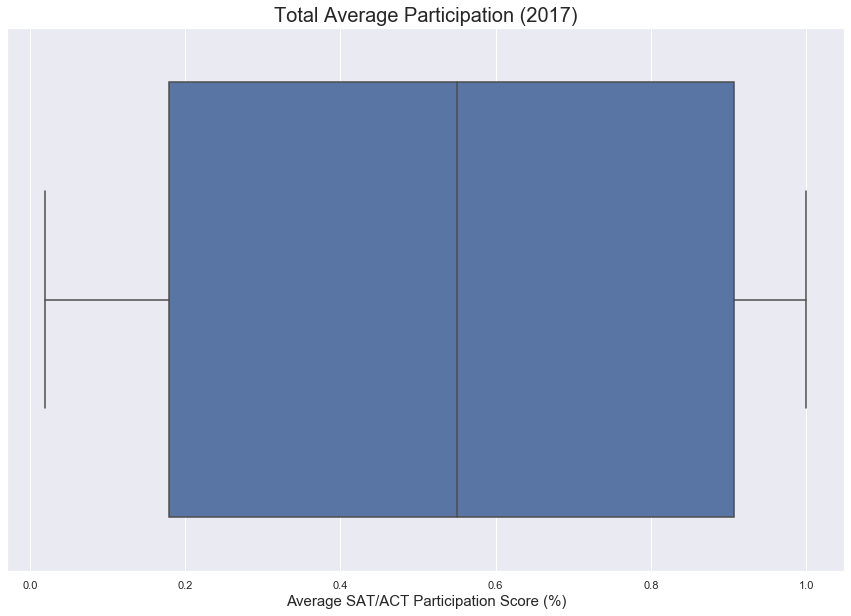

In [151]:
# Numeric Variable 1: Total Participation (2017):

sns.boxplot(['sat_participation_2017', 'act_participation_2017'], data=final)   # pass x plot and y plot, pass data.
plt.xlabel('Average SAT/ACT Participation Score (%)', fontsize=15)               # create xlabel, pass in fontsize=
plt.title('Total Average Participation (2017)', fontsize=20)                      # write title
; 

''

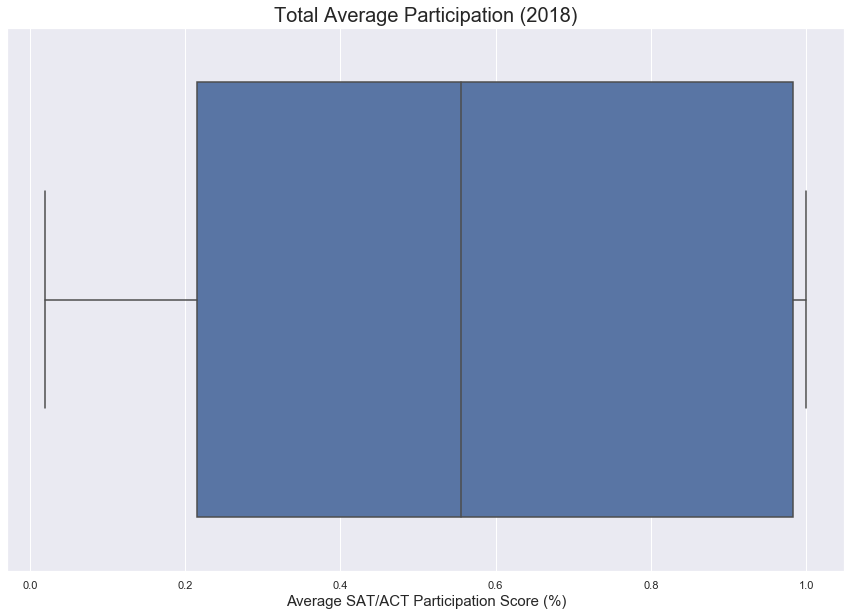

In [152]:
# Numeric Variable 2: Total Participation (2018):

sns.boxplot(['sat_participation_2018', 'act_participation_2018'], data=final)   # pass x plot and y plot, pass data.
plt.xlabel('Average SAT/ACT Participation Score (%)', fontsize=15)               # create xlabel, pass in fontsize=
plt.title('Total Average Participation (2018)', fontsize=20)                      # write title
; 

''

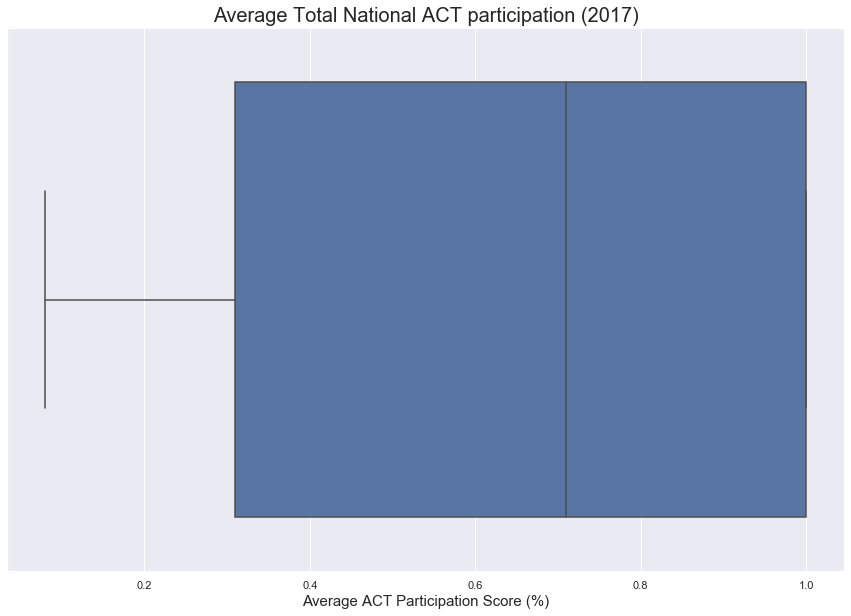

In [153]:
# Average Total National ACT participation (2017-2018)

sns.boxplot(['act_participation_2017'], data=final)   # pass x plot and y plot, pass data.
plt.xlabel('Average ACT Participation Score (%)', fontsize=15)                   # create xlabel, pass in fontsize=
plt.title('Average Total National ACT participation (2017)', fontsize=20)    # write title
; 

''

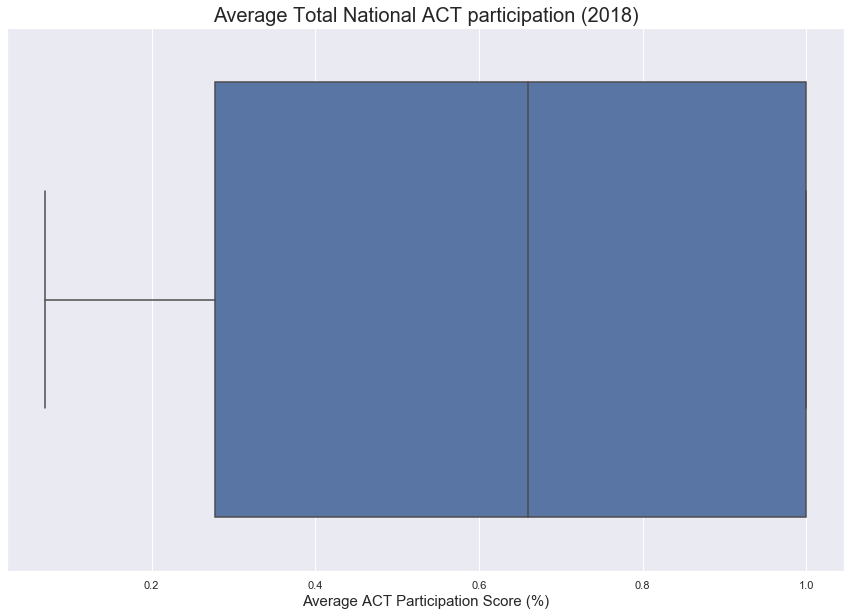

In [154]:
sns.boxplot(['act_participation_2018'], data=final)   # pass x plot and y plot, pass data.
plt.xlabel('Average ACT Participation Score (%)', fontsize=15)                   # create xlabel, pass in fontsize=
plt.title('Average Total National ACT participation (2018)', fontsize=20)    # write title
; 

''

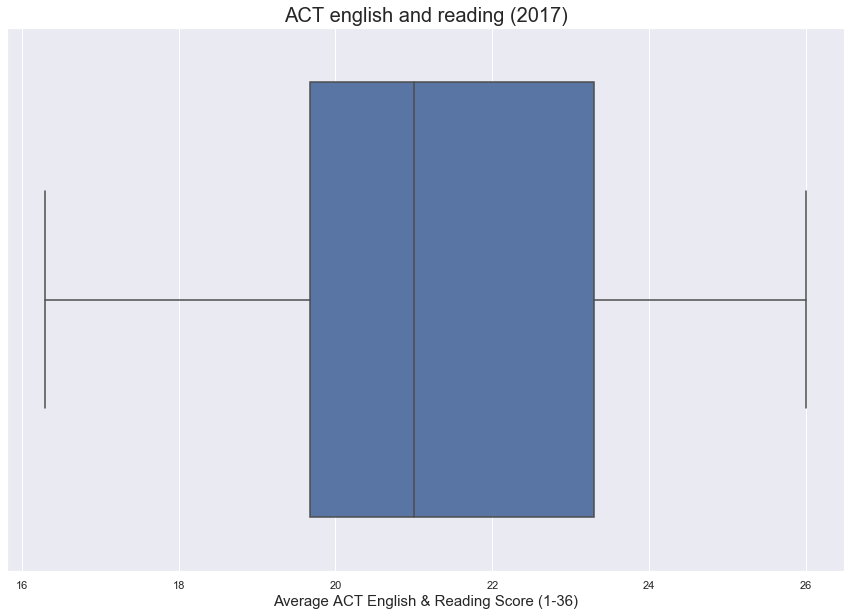

In [155]:
# ACT english and reading (2017)

sns.boxplot(['act_english_2017', 'act_reading_2017'], data=final)   # pass x plot and y plot, pass data.
plt.xlabel('Average ACT English & Reading Score (1-36)', fontsize=15)                   # create xlabel, pass in fontsize=
plt.title('ACT english and reading (2017)', fontsize=20)             # write title
; 

''

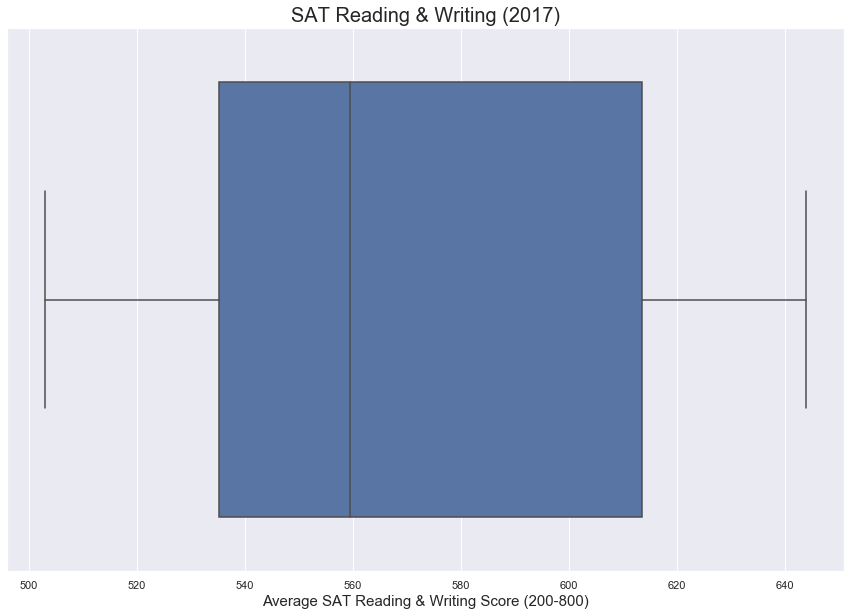

In [156]:
# SAT reading and writing (2017)

sns.boxplot(['sat_rw_2017'], data=final)                                     # pass x plot and y plot, pass data.
plt.xlabel('Average SAT Reading & Writing Score (200-800)', fontsize=15)      # create xlabel, pass in fontsize=
plt.title('SAT Reading & Writing (2017)', fontsize=20)                       # write title
; 

''

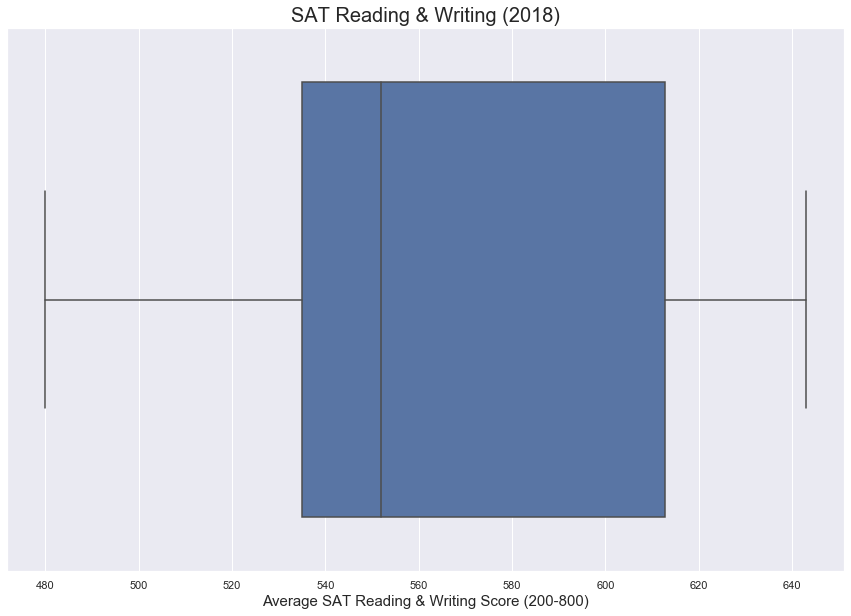

In [157]:
# SAT reading and writing (2018)

sns.boxplot(['sat_rw_2018'], data=final)                                     # pass x plot and y plot, pass data.
plt.xlabel('Average SAT Reading & Writing Score (200-800)', fontsize=15)      # create xlabel, pass in fontsize=
plt.title('SAT Reading & Writing (2018)', fontsize=20)                       # write title
; 

''

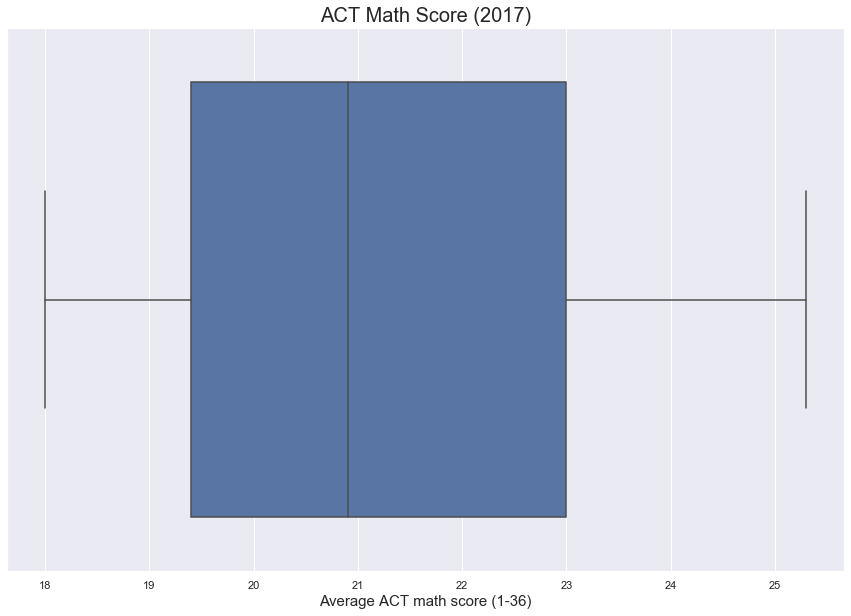

In [158]:
# ACT math (2017)

sns.boxplot(['act_math_2017'], data=final)   # pass x plot and y plot, pass data.
plt.xlabel('Average ACT math score (1-36)', fontsize=15)                   # create xlabel, pass in fontsize=
plt.title('ACT Math Score (2017)', fontsize=20)             # write title
; 

''

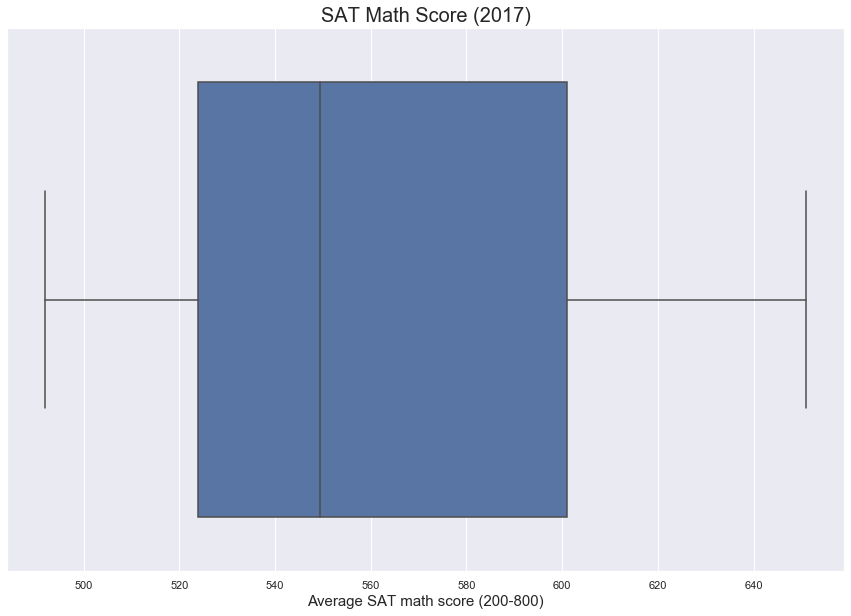

In [159]:
# SAT math (2017)

sns.boxplot(['sat_math_2017'], data=final)                          # pass x plot and y plot, pass data.
plt.xlabel('Average SAT math score (200-800)', fontsize=15)          # create xlabel, pass in fontsize=
plt.title('SAT Math Score (2017)', fontsize=20)                       # write title
; 

''

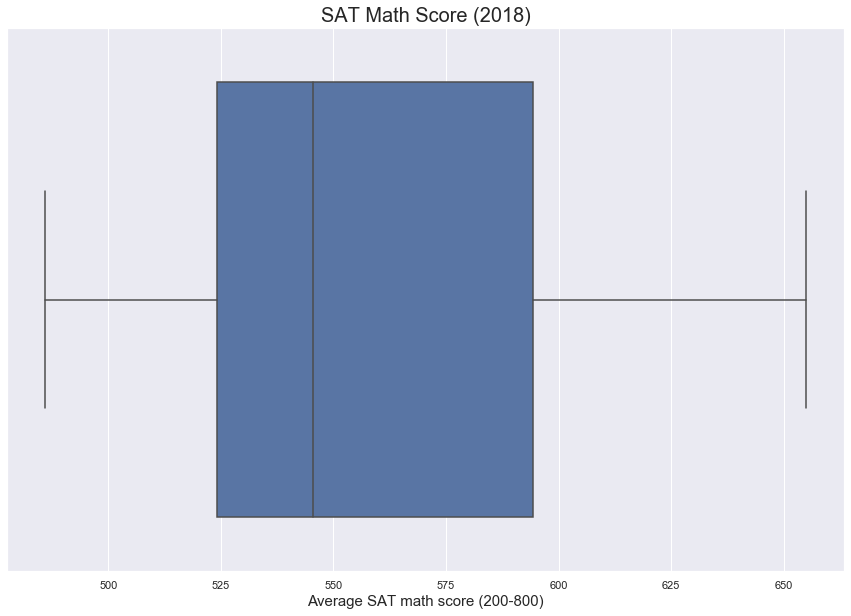

In [160]:
# SAT math (2018)

sns.boxplot(['sat_math_2018'], data=final)                          # pass x plot and y plot, pass data.
plt.xlabel('Average SAT math score (200-800)', fontsize=15)          # create xlabel, pass in fontsize=
plt.title('SAT Math Score (2018)', fontsize=20)                       # write title
; 

''

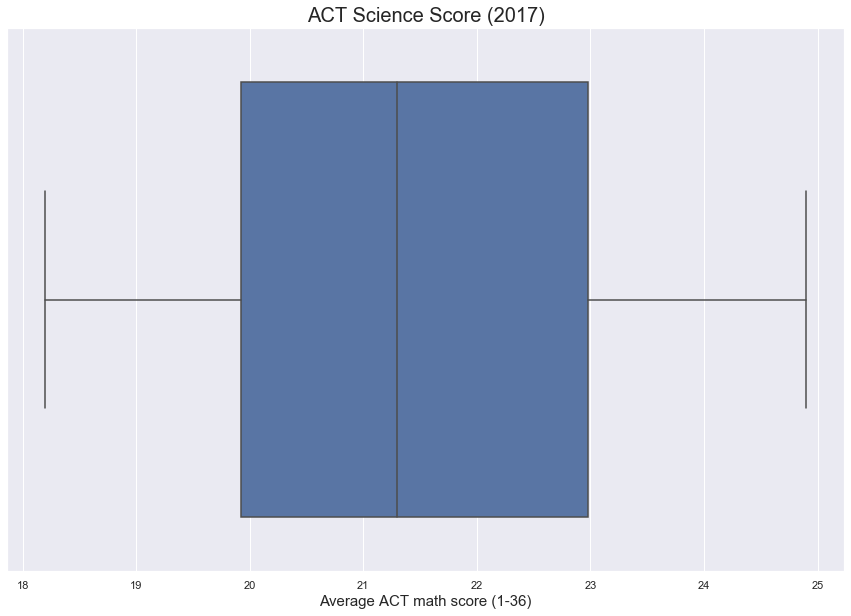

In [161]:
# ACT science (2017)

sns.boxplot(['act_science_2017'], data=final)                  # pass x plot and y plot, pass data.
plt.xlabel('Average ACT math score (1-36)', fontsize=15)        # create xlabel, pass in fontsize=
plt.title('ACT Science Score (2017)', fontsize=20)               # write title
; 

''

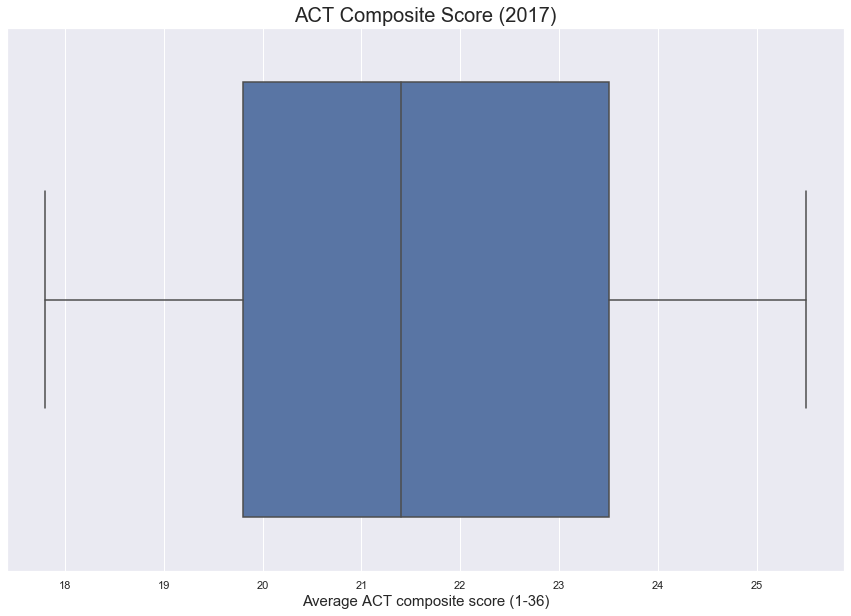

In [162]:
# ACT composite (2017)

sns.boxplot(['act_composite_2017'], data=final)                  # pass x plot and y plot, pass data.
plt.xlabel('Average ACT composite score (1-36)', fontsize=15)     # create xlabel, pass in fontsize=
plt.title('ACT Composite Score (2017)', fontsize=20)               # write title
; 

''

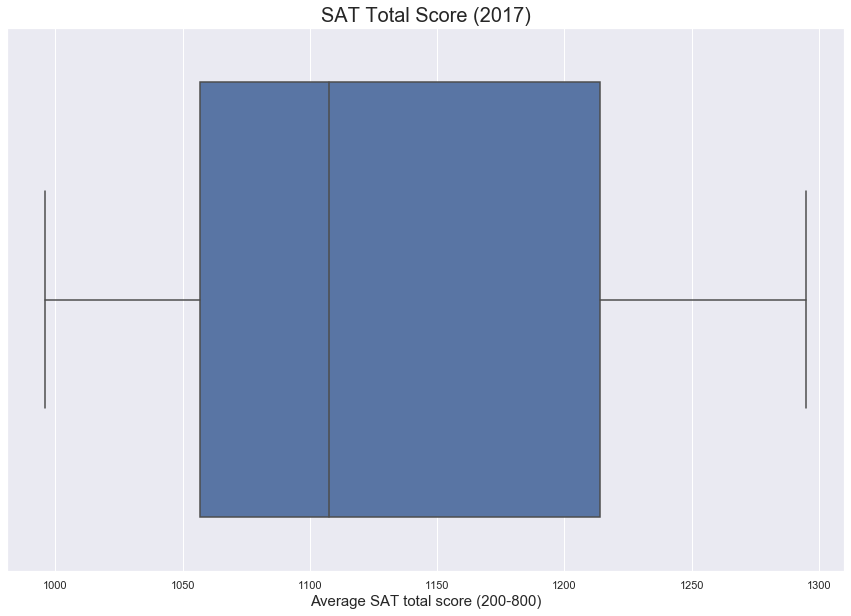

In [163]:
# SAT Total (2017)

sns.boxplot(['sat_total_2017'], data=final)                         # pass x plot and y plot, pass data.
plt.xlabel('Average SAT total score (200-800)', fontsize=15)          # create xlabel, pass in fontsize=
plt.title('SAT Total Score (2017)', fontsize=20)                       # write title
; 

''

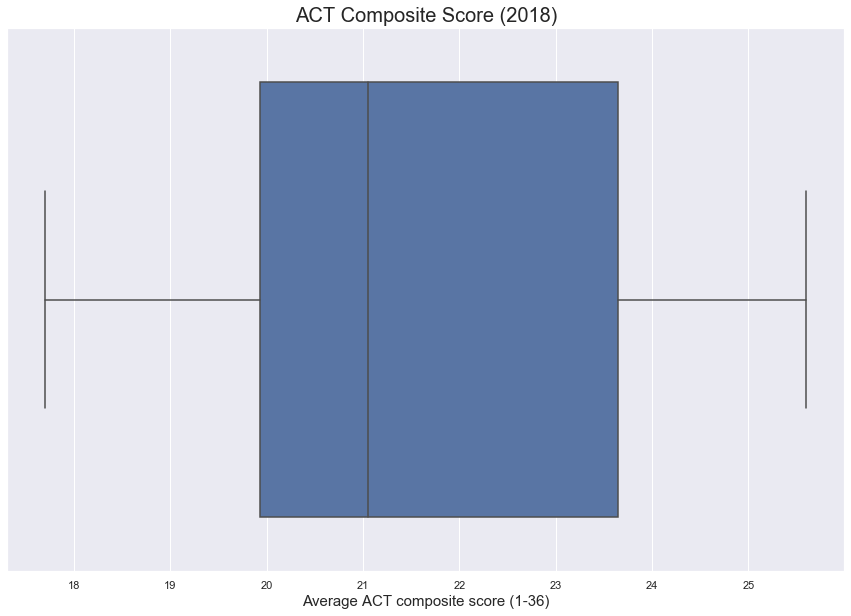

In [164]:
# ACT composite (2018)

sns.boxplot(['act_composite_2018'], data=final)                  # pass x plot and y plot, pass data.
plt.xlabel('Average ACT composite score (1-36)', fontsize=15)     # create xlabel, pass in fontsize=
plt.title('ACT Composite Score (2018)', fontsize=20)               # write title
; 

''

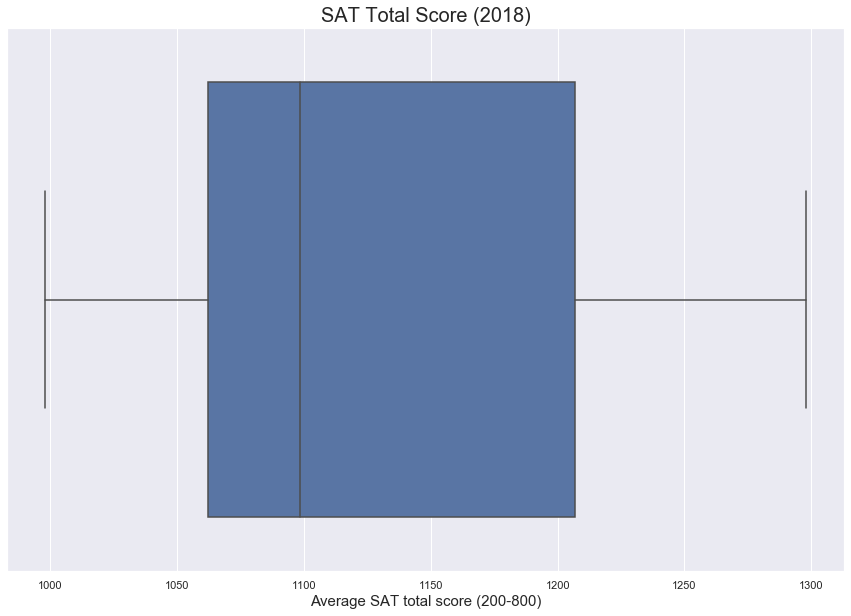

In [165]:
# SAT Total (2018)

sns.boxplot(['sat_total_2018'], data=final)                         # pass x plot and y plot, pass data.
plt.xlabel('Average SAT total score (200-800)', fontsize=15)          # create xlabel, pass in fontsize=
plt.title('SAT Total Score (2018)', fontsize=20)                       # write title
; 

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

I would like to examine the outliars in my plot graphs. 

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

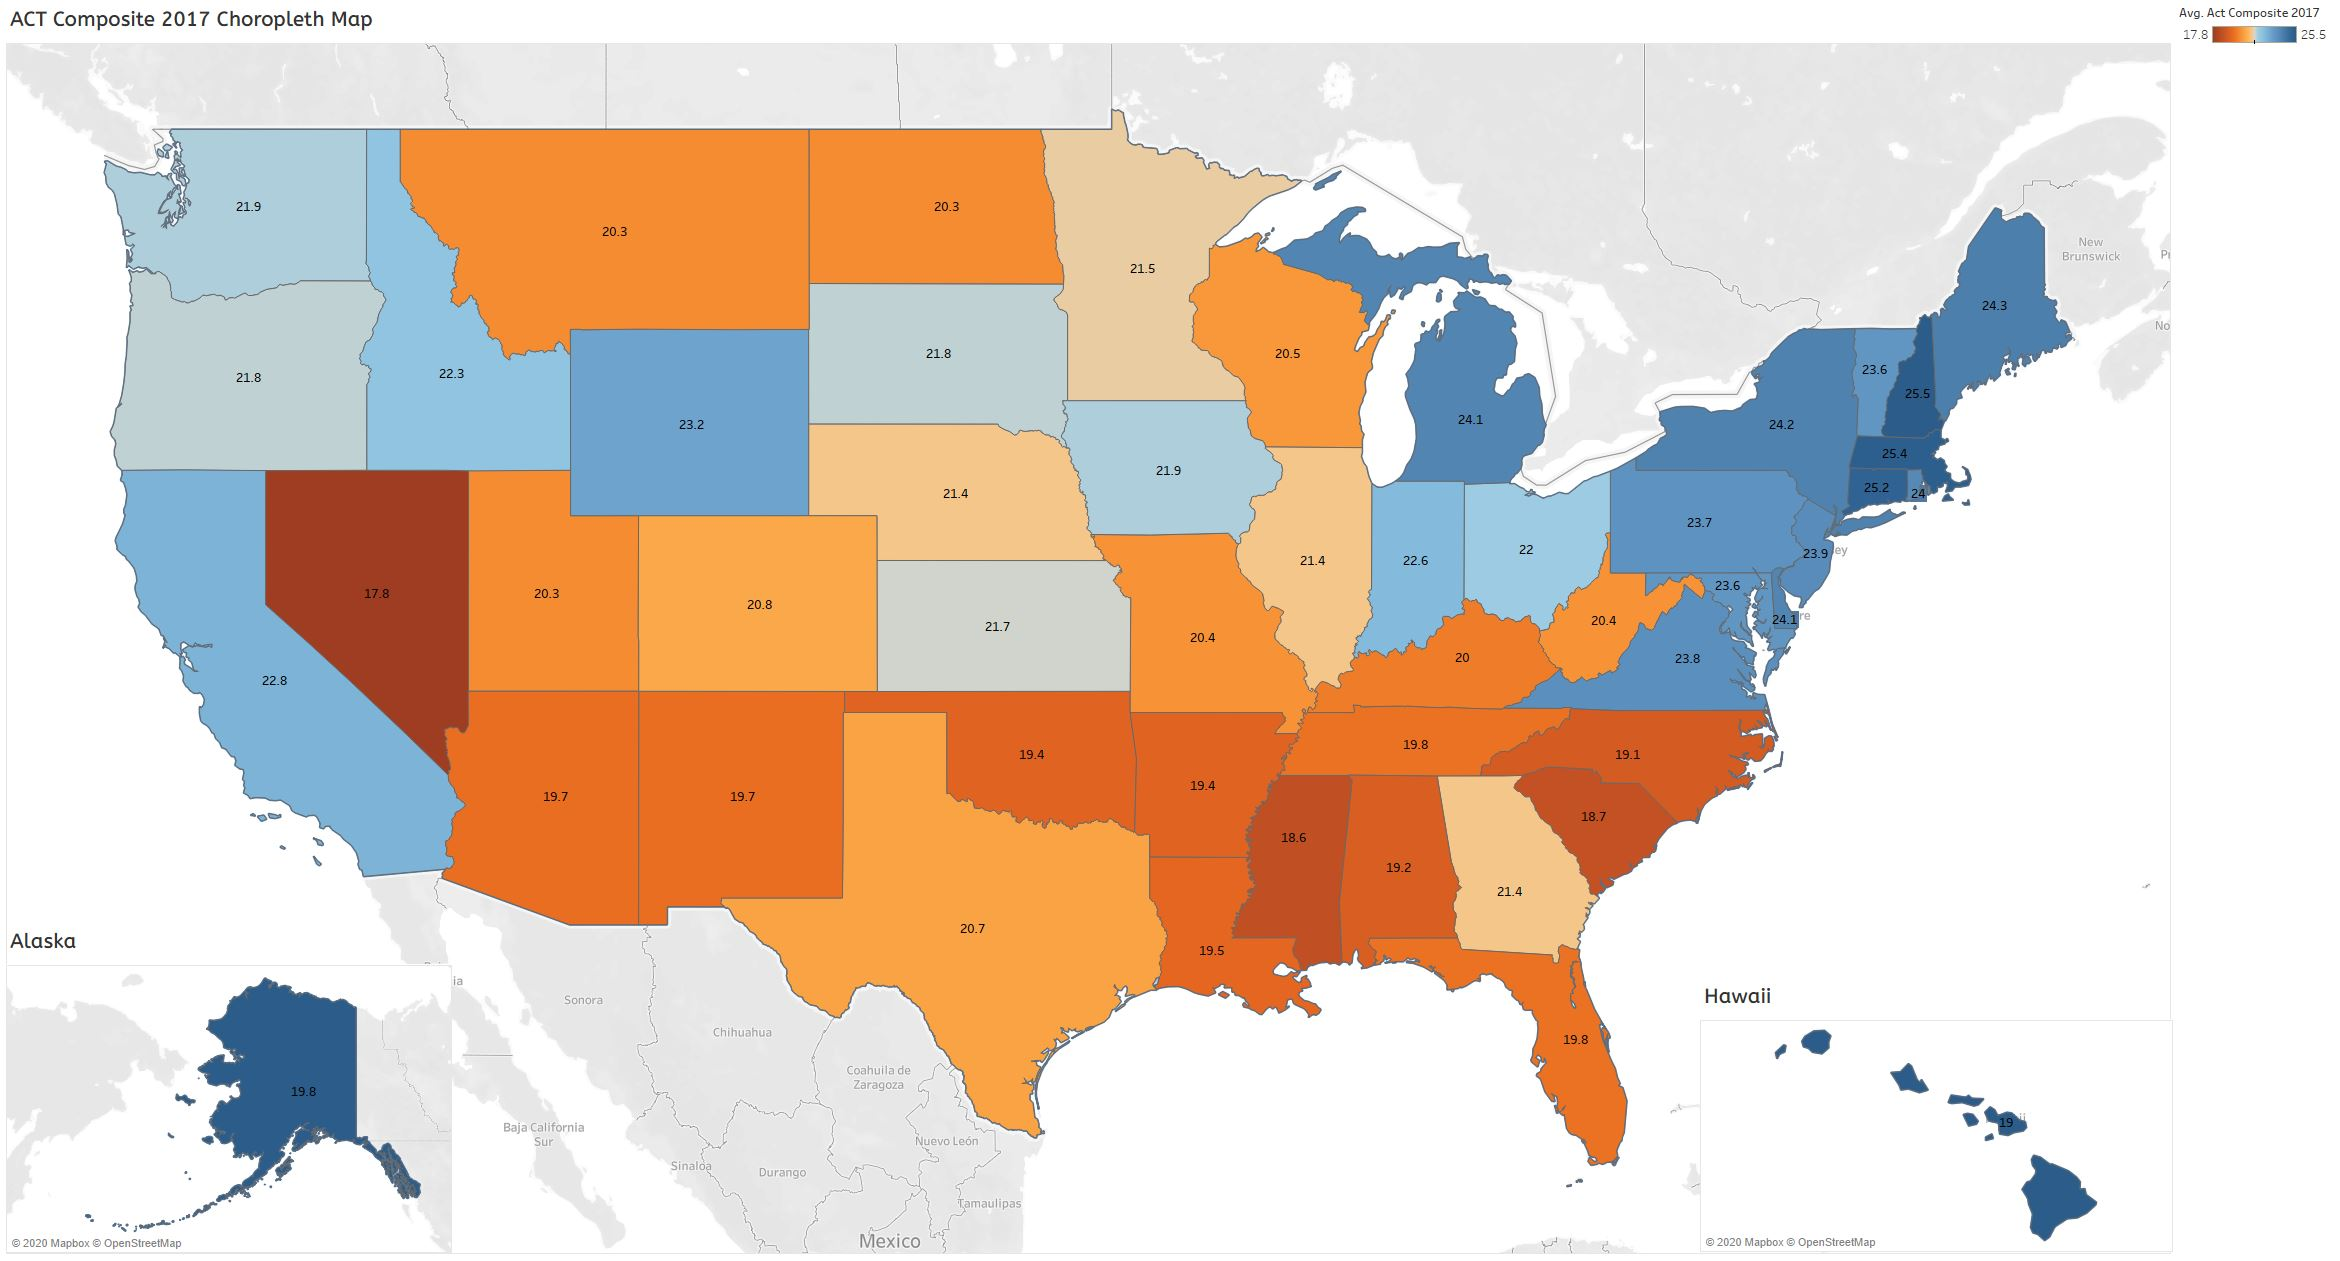

In [171]:
Image("img/act_composite_2017_choropleth.jpg")

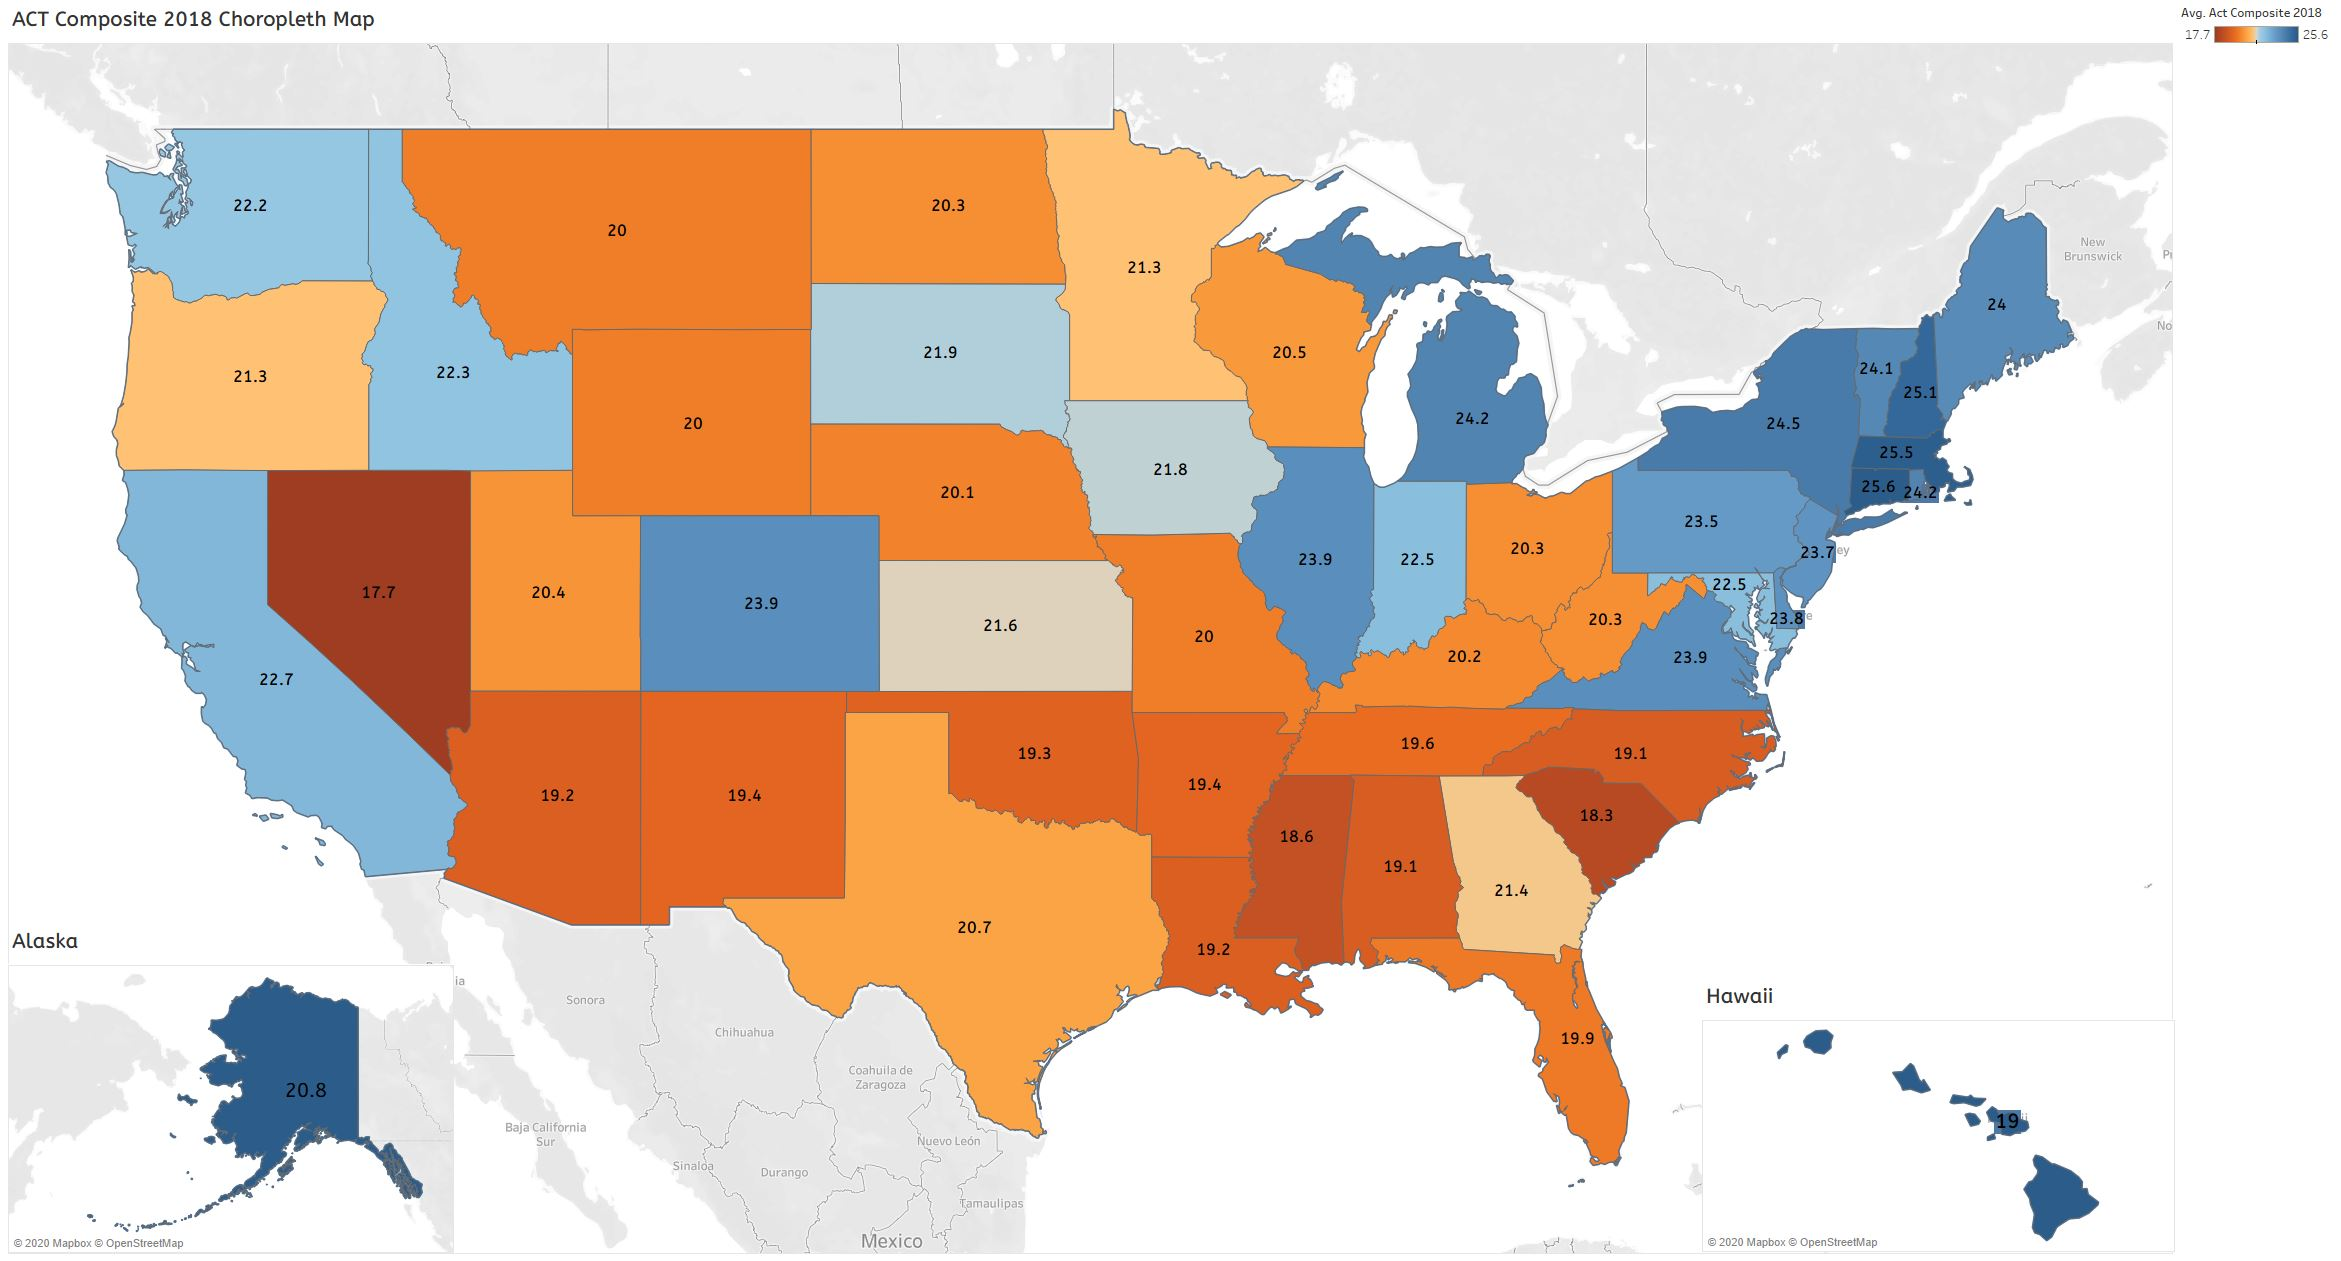

In [173]:
Image("img/act_composite_2018_choropleth.jpg")

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

**Colorado:** Based on my general observation, it seems that Colorado did indeed transition to an SAT in 2018. The average scores with around 1 Standard Deviation from the mean and over all close in comparison to 2017 ACT scores. 

**Illinois:** I wanted to see how scores in illinois compare to national average. 

**Ohio:** After 2017 Ohio will allow students to choose to the SAT or ACT, what are the impacts onf this change? ACT participation dropped 30%, SAT participation dropped 6% as well. 


I used Tableau to generate some of statistics to answer above. 

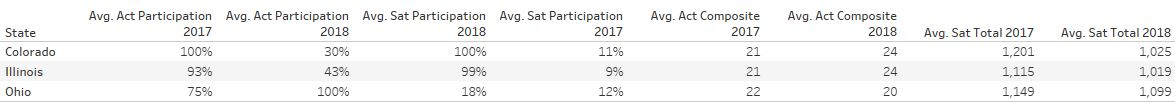

In [174]:
Image("img/colorado_illinois_ohio_table.jpg")

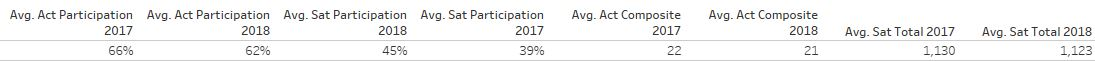

In [175]:
Image("img/national_table.jpg")

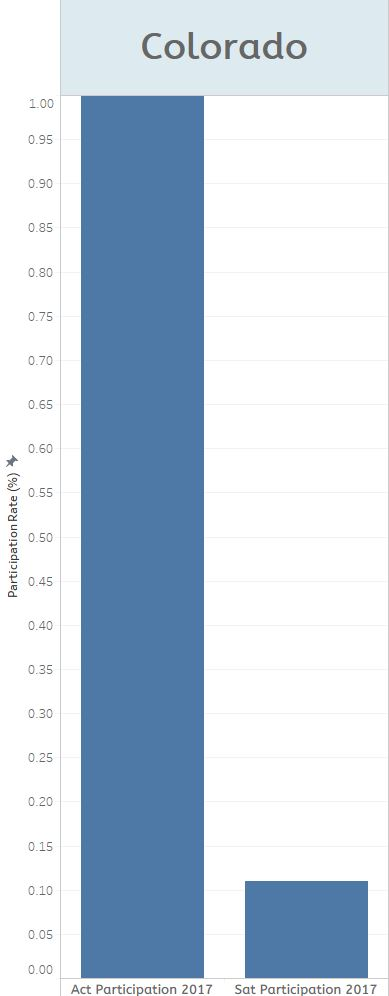

In [176]:
Image("img/colorado_2017_participation_bar.jpg")

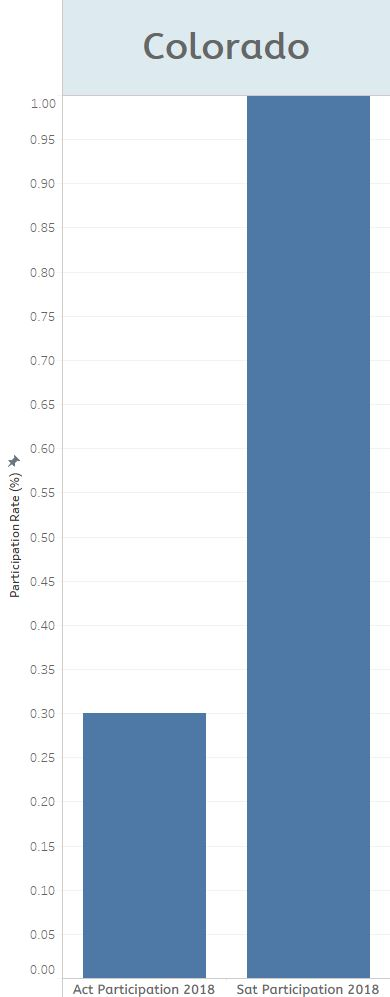

In [177]:
Image("img/colorado_2018_participation_bar.jpg")

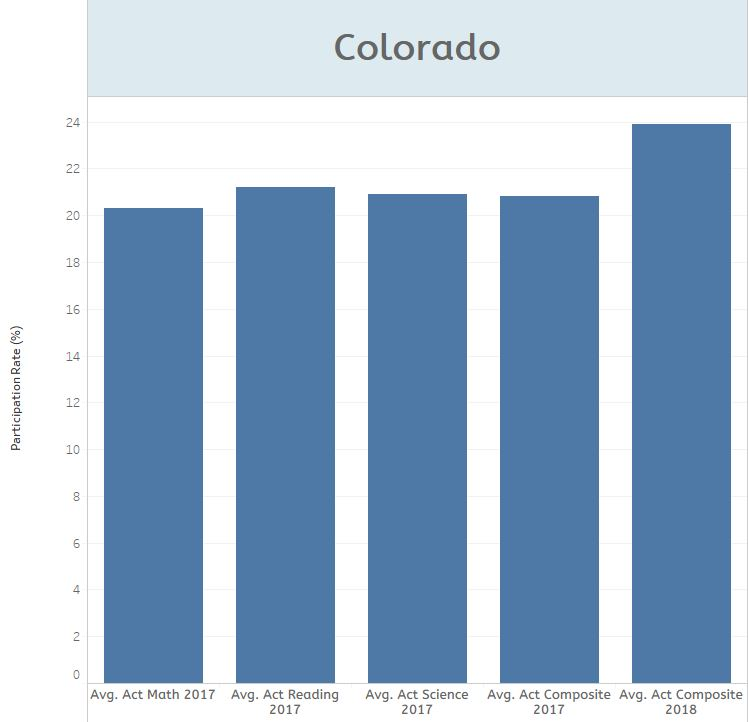

In [178]:
Image("img/colorado_2017_act_bars.jpg")

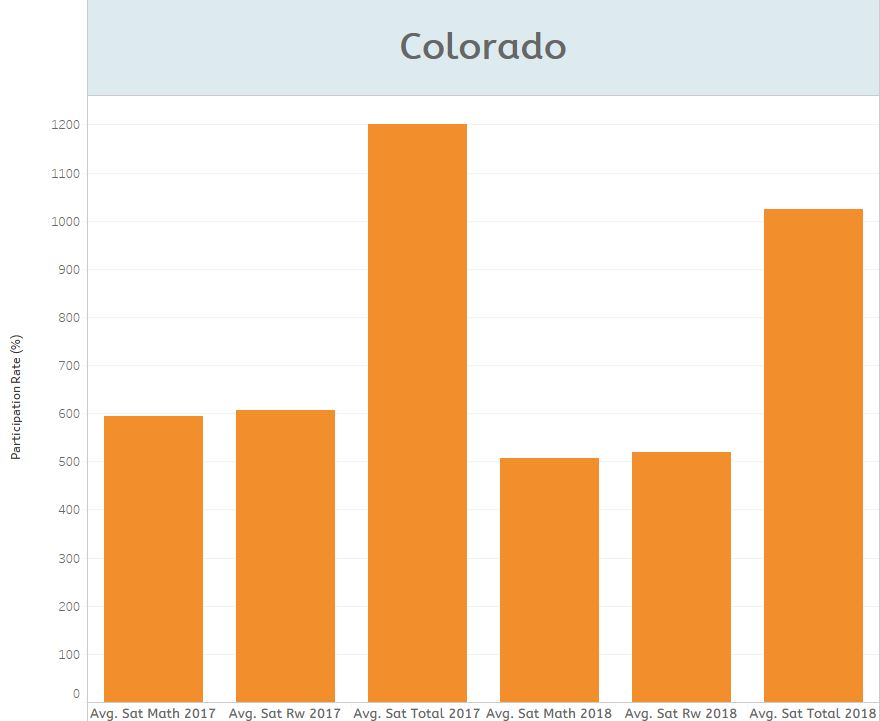

In [179]:
Image("img/colorado_2018_sat_bars.jpg")

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

**In Conclusion:** 

**Colorado:** Based on my own interpretation of the data it is clear that Colorado did in fact transition to SAT in 2018 and their participation rate was 100%. Colorados performance in 2018 was reflective of its performance in 2018. 
 
**Illinois:** ACT score decreased in 2018 and SAT score increased. 

**Ohio:** After 2017 Ohio will allow students to choose to the SAT or ACT, what are the impacts onf this change? ACT participation dropped 30%, SAT participation dropped 6% as well. 









